# Data preparation

## Import libraries and mount google drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Find files and unzip

In [ ]:
# file_path = "yourpath" # should be a zip file

In [ ]:
output_dir = '/content/unzipped_data'
os.makedirs(output_dir, exist_ok=True)

!unzip -q "{file_path}" -d "{output_dir}"

## Convert images into dataframe

In [ ]:
image_paths = []
emotion_labels = []

base_dir = '/content/unzipped_data/test'

for root, dirs, files in os.walk(base_dir):

  for file in files:
    if file.endswith(('.png', '.jpg', '.jpeg')):
      emotion_label = os.path.basename(root) # The subdirectory name is the emotion label
      image_paths.append(os.path.join(root, file))
      emotion_labels.append(emotion_label)

base_dir = '/content/unzipped_data/train'

for root, dirs, files in os.walk(base_dir):

  for file in files:
    if file.endswith(('.png', '.jpg', '.jpeg')):
      emotion_label = os.path.basename(root) # The subdirectory name is the emotion label
      image_paths.append(os.path.join(root, file))
      emotion_labels.append(emotion_label)

print(f"Found {len(image_paths)} images with {len(set(emotion_labels))} unique emotion labels.")
print("First 5 image paths:")
for i in range(min(5, len(image_paths))):
  print(image_paths[i])
print("First 5 emotion labels:")
for i in range(min(5, len(emotion_labels))):
  print(emotion_labels[i])


Found 35887 images with 7 unique emotion labels.
First 5 image paths:
/content/unzipped_data/test/disgust/PrivateTest_51400934.jpg
/content/unzipped_data/test/disgust/PublicTest_41393563.jpg
/content/unzipped_data/test/disgust/PrivateTest_11895083.jpg
/content/unzipped_data/test/disgust/PublicTest_9982221.jpg
/content/unzipped_data/test/disgust/PrivateTest_50594067.jpg
First 5 emotion labels:
disgust
disgust
disgust
disgust
disgust


In [ ]:
# Getting class distribution
print(f"Found {len(image_paths)} images with {len(set(emotion_labels))} unique emotion labels.")
print(f"All unique emotion labels: {list(set(emotion_labels))}")
# image_paths[0]
emotion_counts = pd.Series(emotion_labels).value_counts()
print(emotion_counts)

Found 35887 images with 7 unique emotion labels.
All unique emotion labels: ['fear', 'neutral', 'happy', 'disgust', 'sad', 'angry', 'surprise']
happy       8989
neutral     6198
sad         6077
fear        5121
angry       4953
surprise    4002
disgust      547
Name: count, dtype: int64


In [ ]:
from PIL import Image

img = Image.open(image_paths[0])
# Convert to NumPy array
img_array = np.array(img)

flat_img_array = img_array.flatten()
print(img_array.shape)
print(flat_img_array.shape)

(48, 48)
(2304,)


## Load data into flattened and 2D vectors

In [ ]:
flat_img_rows = []  # For SVM and NN
twod_img = []       # For CNN

for i, path in enumerate(image_paths):
    img = Image.open(path)
    img_array = np.array(img)

    # For CNN, store 2D version
    twod_img.append(img_array)

    # For SVM and NN, store flattened version
    flat_img_rows.append(img_array.flatten())

y = np.array(emotion_labels)
X_flat = np.array(flat_img_rows)    # shape: (N, 2304)
X_2d = np.array(twod_img)           # shape: (N, 48, 48)

In [ ]:
print(X_flat)
print(X_flat.shape)
print(y)
print(y.shape)
print(X_2d)
print(X_2d.shape)

[[ 82  89  96 ... 209 214 208]
 [255 251  96 ... 255 255 255]
 [ 22  13  14 ... 104 216 255]
 ...
 [ 85  87  71 ...  63  39  45]
 [ 35  37  37 ... 129  81  69]
 [ 19  19  17 ...  26  26  26]]
(35887, 2304)
['disgust' 'disgust' 'disgust' ... 'sad' 'sad' 'sad']
(35887,)
[[[ 82  89  96 ... 194 189 185]
  [ 83  90  98 ... 197 192 188]
  [ 85  92 101 ... 197 193 189]
  ...
  [159 161 161 ... 209 198 188]
  [157 157 154 ... 211 208 203]
  [150 155 153 ... 209 214 208]]

 [[255 251  96 ...  77 170 254]
  [255 216  93 ...  89 146 255]
  [255 193 115 ... 131 149 253]
  ...
  [255 254 254 ... 255 255 255]
  [255 255 254 ... 255 255 254]
  [254 255 255 ... 255 255 255]]

 [[ 22  13  14 ...  11  15  22]
  [ 18  19  17 ...  15  15  16]
  [ 16  15  18 ...  19  19  16]
  ...
  [190 174  79 ... 106 125 223]
  [174 164 132 ... 115 159 249]
  [152 142 123 ... 104 216 255]]

 ...

 [[ 85  87  71 ...  83 102  94]
  [ 90  80  82 ...  73  93  97]
  [116  80  94 ...  72  76  99]
  ...
  [ 60  39  33 ...  65 

In [ ]:
# View the class distrubution
label_proportion = pd.Series(y).value_counts() / len(X_flat)
label_distribution = label_proportion * len(X_flat)
display(label_distribution, label_proportion)

happy       8989.0
neutral     6198.0
sad         6077.0
fear        5121.0
angry       4953.0
surprise    4002.0
disgust      547.0
Name: count, dtype: float64

happy       0.250481
neutral     0.172709
sad         0.169337
fear        0.142698
angry       0.138017
surprise    0.111517
disgust     0.015242
Name: count, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Reduce dimensionality using t-SNE



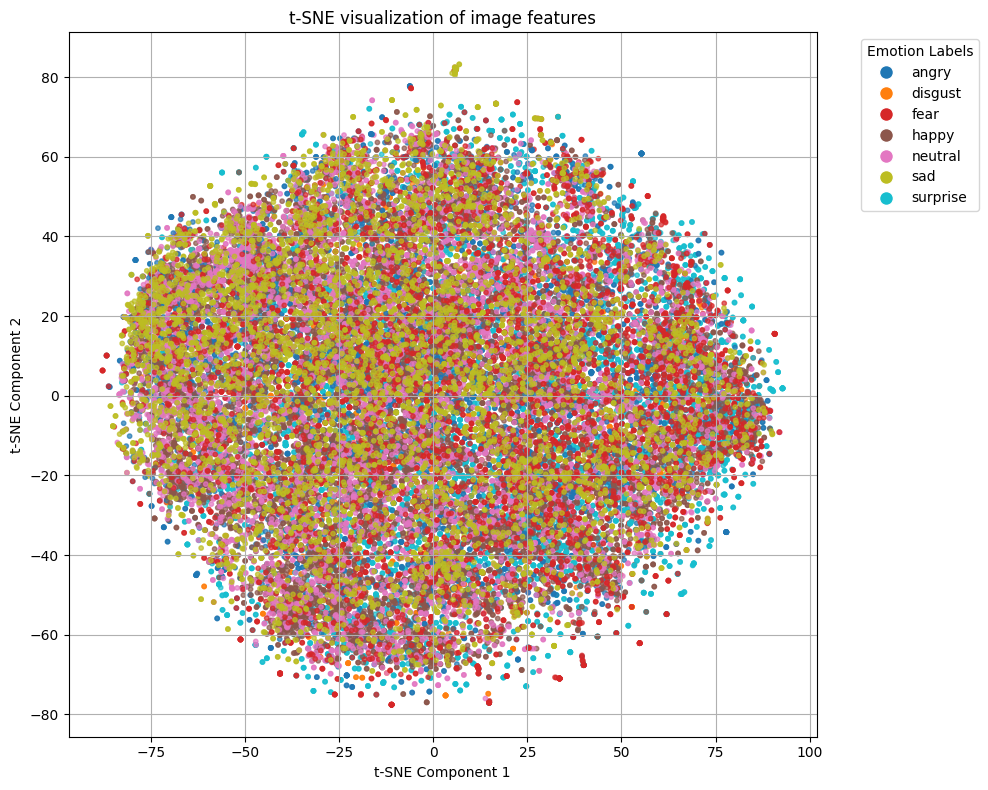

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42) # Using random_state for reproducibility
X2d = tsne.fit_transform(X_flat)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X2d[:, 0], X2d[:, 1], c=y_encoded, cmap='tab10', s=10, alpha=0.7)

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=scatter.cmap(scatter.norm(value)), markersize=10)
                   for value, label in enumerate(label_encoder.classes_)]
plt.legend(handles=legend_elements, title="Emotion Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

## Splitting data into train/validation/test sets (60/20/20)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Train/Test
X_flat_trainval, X_flat_test, \
X_2d_trainval,  X_2d_test, \
y_trainval,     y_test = train_test_split(
    X_flat, X_2d, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train/Validation
X_flat_train, X_flat_val, \
X_2d_train,  X_2d_val, \
y_train,     y_val = train_test_split(
    X_flat_trainval, X_2d_trainval, y_trainval,
    test_size=0.25,            # 0.25 of 0.8 = 0.2 --> 60% train, 20% val, 20% test
    random_state=42,
    stratify=y_trainval
)

## Handling class imbalance (undersampling)

This is only for SVM and CNN models. Further exploration should include

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# For SVM at least? Otherwise we can try oversampling or smote
rus = RandomUnderSampler(random_state=42)
X_flat_resampled, y_resampled = rus.fit_resample(X_flat_train, y_train)

idx = rus.sample_indices_

# This will be our training data
X_flat_resampled = X_flat_train[idx]
X_2d_resampled = X_2d_train[idx]
y_resampled = y_train[idx]

In [ ]:
print(X_2d_resampled.shape)
print(X_flat_resampled.shape)

(2303, 48, 48)
(2303, 2304)


In [ ]:
label_proportion = pd.Series(y_resampled).value_counts() / len(X_flat_resampled)
label_distribution = label_proportion * len(X_flat_resampled)
display(label_distribution, label_proportion)

angry       329.0
disgust     329.0
fear        329.0
happy       329.0
neutral     329.0
sad         329.0
surprise    329.0
Name: count, dtype: float64

angry       0.142857
disgust     0.142857
fear        0.142857
happy       0.142857
neutral     0.142857
sad         0.142857
surprise    0.142857
Name: count, dtype: float64

# Modeling (with disgust images)

## SVM Model

### Training SVM (rbf kernel) with hyperparameter optimization using validation set

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report

def train_svm_rbf(X_train, y_train, X_val, y_val, X_test, y_test):
    # Optimizing hyperparameters using for loop
    C_vals = [1, 10, 100]
    gamma_vals = ['scale', 'auto', 0.01, 0.001]
    best_f1 = 0
    best_params = None
    best_model = None

    for C in C_vals:
        for gamma in gamma_vals:
            svm = SVC(kernel='rbf', C=C, gamma=gamma, class_weight=None, random_state=42)

            # Train on training set
            svm.fit(X_train, y_train)

            # Evaluate on validation set
            val_preds = svm.predict(X_val)
            f1 = f1_score(y_val, val_preds, average='macro')

            if f1 > best_f1:
                best_f1 = f1
                best_params = {'C': C, 'gamma': gamma, 'kernel': 'rbf'}
                best_model = svm

    print("Best validation F1 (macro):", best_f1)
    print("Best parameters:", best_params)

    if best_model is None or best_params is None:
        return None, None, None

    # Retrain best model on train + val combined
    X_train_full = np.vstack([X_train, X_val])
    y_train_full = np.concatenate([y_train, y_val])

    final_svm = SVC(kernel='rbf',
                    C=best_params['C'],
                    gamma=best_params['gamma'],
                    class_weight=None)
    final_svm.fit(X_train_full, y_train_full)

    # Evaluate on test set
    test_preds = final_svm.predict(X_test)

    return final_svm, best_params, test_preds

In [ ]:
# Train the SVM (rbf kernel) classifier
svm_rbf, best_params_rbf, rbf_test_preds = train_svm_rbf(X_flat_resampled, y_resampled, X_flat_val, y_val, X_flat_test, y_test)

Best validation F1 (macro): 0.2938008154519582
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### Evaluation metrics of SVM (RBF kernel)

In [ ]:
# Evaluation on test set
print("\nFinal Test Accuracy:", accuracy_score(y_test, rbf_test_preds))
print("Classification Report:\n")
print(classification_report(y_test, rbf_test_preds))

print("Best Hyperparameters:", best_params_rbf)


Final Test Accuracy: 0.404151574254667
Classification Report:

              precision    recall  f1-score   support

       angry       0.28      0.27      0.27       991
     disgust       0.42      0.55      0.47       109
        fear       0.31      0.29      0.30      1024
       happy       0.52      0.58      0.55      1798
     neutral       0.36      0.36      0.36      1240
         sad       0.33      0.31      0.32      1216
    surprise       0.56      0.52      0.54       800

    accuracy                           0.40      7178
   macro avg       0.40      0.41      0.40      7178
weighted avg       0.40      0.40      0.40      7178

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


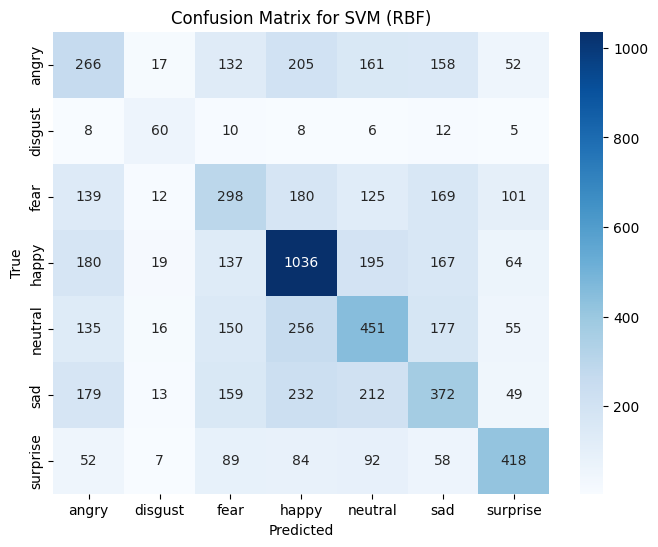

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rbf_test_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM (RBF)")
plt.show()

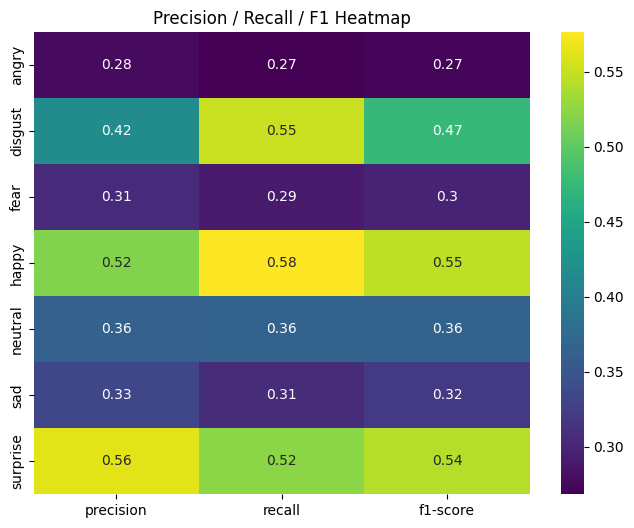

In [ ]:
report = classification_report(y_test, rbf_test_preds, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:-3, :3], annot=True, cmap="viridis")
plt.title("Precision / Recall / F1 Heatmap")
plt.show()

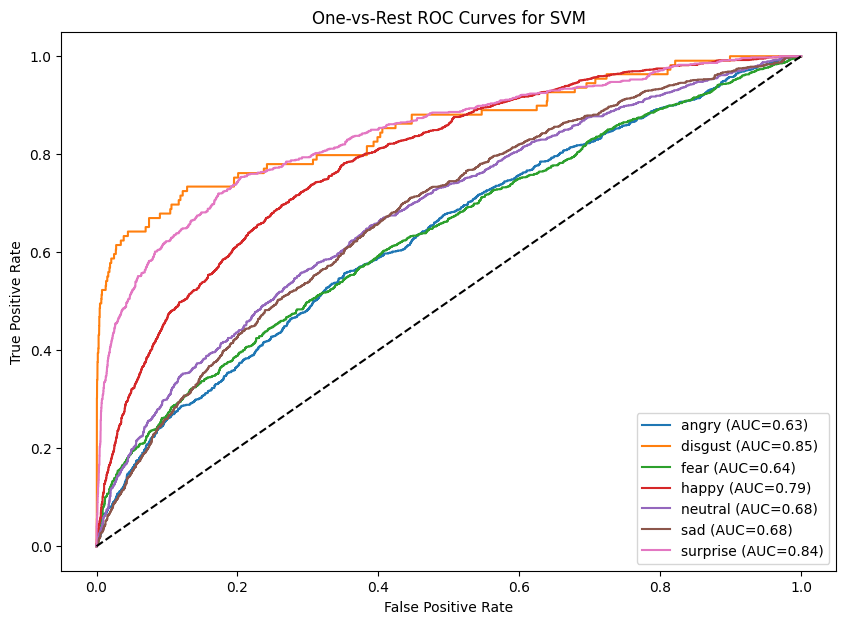

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-vs-all format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

svm_prob = svm_rbf.decision_function(X_flat_test)

plt.figure(figsize=(10,7))
for i, emotion in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for SVM")
plt.show()

### PCA dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
# X_flat_resampled, y_resampled, X_flat_val, y_val, X_flat_test, y_test
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_flat_resampled)
X_val_pca = pca.transform(X_flat_val)
X_test_pca = pca.transform(X_flat_test)

print(X_train_pca.shape)

(2303, 213)


### Training SVM (rbf kernel) + PCA

In [ ]:
# Train the SVM (rbf kernel) classifier
svm_rbf_pca, best_params_rbf, rbf_pca_test_preds = train_svm_rbf(X_train_pca, y_resampled, X_val_pca, y_val, X_test_pca, y_test)

Best validation F1 (macro): 0.2892146661362305
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


15 minutes -> 1 minute implementing PCA dimensionality reduction

### Evaluation metrics of SVM + PCA

In [ ]:
# Evaluation on test set
print("\nFinal Test Accuracy:", accuracy_score(y_test, rbf_pca_test_preds))
print("Classification Report:\n")
print(classification_report(y_test, rbf_pca_test_preds))

print("Best Hyperparameters:", best_params_rbf)


Final Test Accuracy: 0.3863193089997214
Classification Report:

              precision    recall  f1-score   support

       angry       0.26      0.28      0.27       991
     disgust       0.31      0.56      0.40       109
        fear       0.27      0.29      0.28      1024
       happy       0.52      0.53      0.52      1798
     neutral       0.36      0.34      0.35      1240
         sad       0.33      0.29      0.31      1216
    surprise       0.54      0.51      0.53       800

    accuracy                           0.39      7178
   macro avg       0.37      0.40      0.38      7178
weighted avg       0.39      0.39      0.39      7178

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


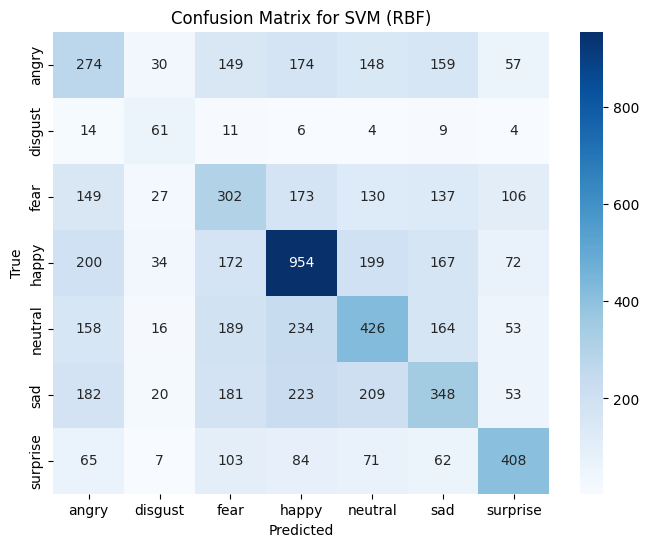

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rbf_pca_test_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM (RBF)")
plt.show()

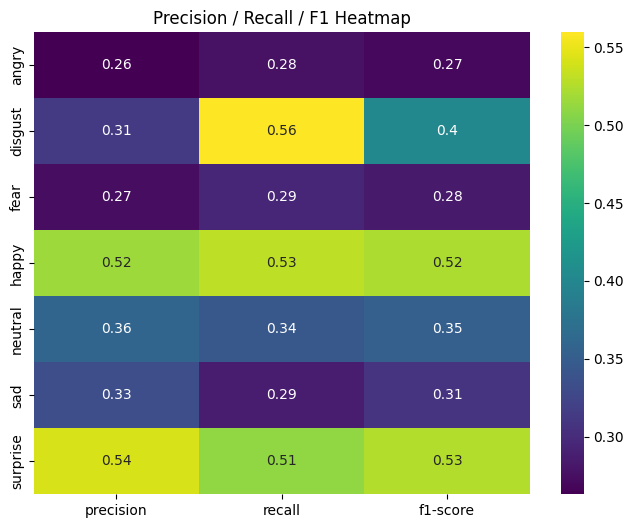

In [ ]:
report = classification_report(y_test, rbf_pca_test_preds, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:-3, :3], annot=True, cmap="viridis")
plt.title("Precision / Recall / F1 Heatmap")
plt.show()

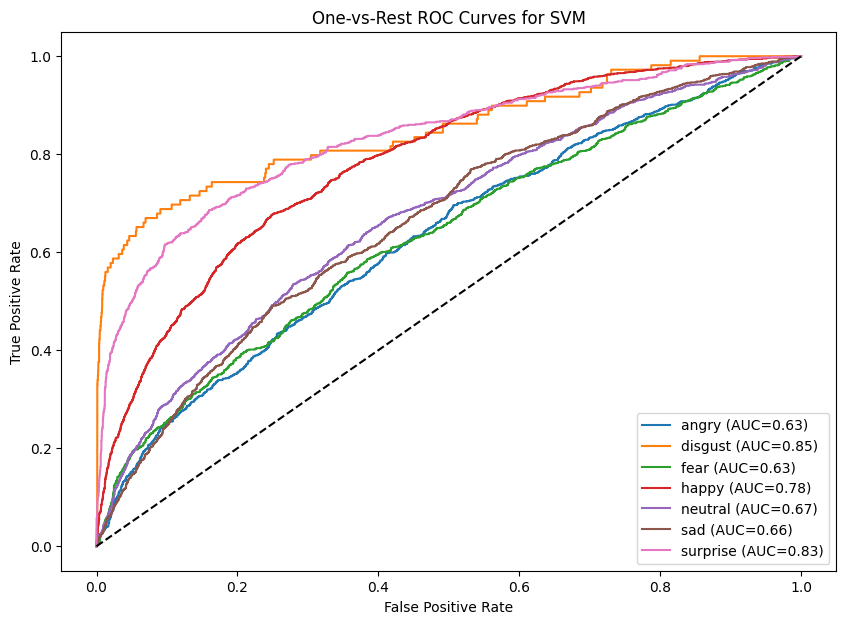

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-vs-all format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

svm_prob = svm_rbf_pca.decision_function(X_test_pca)

plt.figure(figsize=(10,7))
for i, emotion in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for SVM")
plt.show()

## Convolutional Neural Network Model

### Loading data into a PyTorch Tensor

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CNNEmotionDataset(Dataset):
    def __init__(self, images, labels, label_encoder, img_size=48, is_train=False, augmentation=None):
        self.images = images # Corrected typo from self.itomages
        self.labels = label_encoder.fit_transform(labels)
        self.img_size = img_size
        self.is_train = is_train
        self.augmentation = augmentation

        # CNN transform
        self.base_transform = transforms.Compose([
            transforms.Resize((img_size, img_size)), # keep original size, ensuring consistency
            transforms.ToTensor(),                   # converts HWC -> CHW, grayscale -> (1,H,W)
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

        # Build augmentation pipeline only for training
        if is_train and augmentation:
            aug_list = []

            # Horizontal flip
            if augmentation.get("hflip", False):
                aug_list.append(transforms.RandomHorizontalFlip(p=0.5))

            # Rotation
            rotation_range = augmentation.get("rotation", None)
            if rotation_range:
                aug_list.append(transforms.RandomRotation(rotation_range))

            # Color jitter — NOT used for grayscale but included for flexibility
            if augmentation.get("color_jitter", None):
                aug_list.append(augmentation["color_jitter"])

            # Combine augmentation + base transforms
            self.transform = transforms.Compose(aug_list + [
                transforms.Resize((img_size, img_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])
            ])
        else:
            # Use base transforms only
            self.transform = self.base_transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        img = Image.fromarray(img.astype(np.uint8))
        img = self.transform(img)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label

In [ ]:
augmentation_emotion = {
    'hflip': True,
    'rotation': (-15, 15)
}

X_2d_combined_train = np.concatenate([X_2d_train, X_2d_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)

# Build tensor datasets using previous split sets (same ones from SVM)
train_dataset = CNNEmotionDataset(X_2d_combined_train, y_combined, label_encoder, is_train=True, augmentation=augmentation_emotion)
test_dataset = CNNEmotionDataset(X_2d_test, y_test, label_encoder)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Testing & logging functions

In [ ]:
def test(network, test_loader, loss_function, device):
    network.eval()  # Updates any network layers that behave differently in training and execution
    test_loss = 0
    num_batches = 0

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)

            output = network(data)
            test_loss += loss_function(output, target).item()
            num_batches += 1
    test_loss /= num_batches
    #print('\nTest set: Avg. loss: {:.4f})\n'.format(test_loss))
    return test_loss

def logResults(epoch, num_epochs, train_loss, train_loss_history,
               test_loss, test_loss_history, epoch_counter, print_interval=100):

    if (epoch % print_interval == 0):
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    epoch_counter.append(epoch)

def graphLoss(epoch_counter, train_loss_hist, test_loss_hist, loss_name="Loss", start=0):
    plt.figure(figsize=(8,5))
    plt.plot(epoch_counter[start:], train_loss_hist[start:], label="Train Loss", color='blue')
    plt.plot(epoch_counter[start:], test_loss_hist[start:], label="Test Loss", color='red')
    plt.xlabel("#Epochs")
    plt.ylabel(loss_name)
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.grid(True)
    plt.show()

def computeLabelAccuracy(network, data_loader, device, label_text="CNN"):
    network.eval()
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)

            output = network(data)
            preds = output.argmax(dim=1)  # Check if the maximum/largest output class matches the label
            correct += (preds == target).sum().item()

    total = len(data_loader.dataset)
    accuracy = 100. * correct / total

    print(f"\n{label_text} Accuracy: {correct}/{total} ({accuracy:.1f}%)")
    return accuracy


def graphConfusionMatrix(model, test_loader, label_names, device):
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = outputs.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Compute confusion matrix normalized per true class
    cm = confusion_matrix(all_labels, all_preds, normalize='true')

    # Plot
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f",
                xticklabels=label_names,
                yticklabels=label_names,
                cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix (Normalized by True Labels)")
    plt.tight_layout()
    plt.show()

In [ ]:
import torch.nn.functional as F

def get_predictions_and_probs(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)

            outputs = model(images)             # logits
            probs = F.softmax(outputs, dim=1)   # convert to probabilities

            preds = outputs.argmax(dim=1).cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels.numpy())
            all_probs.extend(probs.cpu().numpy())

    return np.array(all_preds), np.array(all_labels), np.array(all_probs)


### Training functions

In [ ]:
def train(model, dataloader, loss_function, optimizer, device, batch_logging=100):
    model.train() # Updates any network layers that behave differently in training and execution
    avg_loss = 0
    num_batches = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()                    # Gradients need to be reset each batch
        outputs = model(inputs)                  # Forward pass: compute the output class given a image
        loss = loss_function(outputs, targets)   # Compute the loss: difference between the output and correct result
        loss.backward()                          # Backward pass: compute the gradients of the model with respect to the loss
        optimizer.step()

        avg_loss += loss.item()
        num_batches += 1

        if (batch_idx + 1) % batch_logging == 0: # Print info every "batch_logging" steps
            print(f"Batch [{batch_idx+1}/{len(dataloader)}], Loss: {avg_loss/num_batches:.4f}")

    return avg_loss / num_batches

In [ ]:
def trainAndGraph(model, train_loader, test_loader, loss_function, optimizer, device, num_epochs=20, early_stopping=True, logging_interval=1):
  # Arrays to store training history
    train_loss_history = []
    test_loss_history = []
    epoch_counter = []

    best_loss = 999999
    last_loss = 999999

    print("Starting training...")

    for epoch in range(num_epochs):

        train_loss = train(model, train_loader, loss_function, optimizer, device)
        test_loss = test(model, test_loader, loss_function, device)
        logResults(epoch, num_epochs, train_loss, train_loss_history,
                   test_loss, test_loss_history, epoch_counter,
                   logging_interval)

        if early_stopping and test_loss > last_loss:
            print(f"Early stopping at epoch {epoch+1}, test loss increased.")
            break

        if test_loss < best_loss:
            best_loss = test_loss
            torch.save(model.state_dict(), "best_model.pt")

        last_loss = test_loss

    graphLoss(epoch_counter, train_loss_history, test_loss_history)
    print(f"Training complete. Best test loss: {best_loss:.4f}")
    return model

### Defining CNN model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN_Emotion(nn.Module):
    def __init__(self, num_classes=7):  # use 6 if "disgust" removed
        super().__init__()

        # Low-level edge & texture extraction
        # Conv1a: Detects simple edges, gradients, corners (32 filters)
        self.conv1a = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1a   = nn.BatchNorm2d(32)      # stabilizes learning

        # Conv1b: Learns slightly more abstract features (32 filters)
        self.conv1b = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1b   = nn.BatchNorm2d(32)

        self.pool1  = nn.MaxPool2d(2, 2)      # (48x48 -> 24x24)
        self.drop1  = nn.Dropout(0.25)        # regularization to prevent overfitting

        # Mid-level facial features
        # Conv2a: Learns shapes like eyes, mouth curves (64 filters)
        self.conv2a = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2a   = nn.BatchNorm2d(64)

        # Conv2b: Learns composite features (furrowed brow, smile lines)
        self.conv2b = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2b   = nn.BatchNorm2d(64)

        self.pool2  = nn.MaxPool2d(2, 2)      # (24x24 -> 12x12)
        self.drop2  = nn.Dropout(0.25)

        # High-level facial expression patterns
        # Conv3a: Learns emotion-specific features like widened eyes (128 filters)
        self.conv3a = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3a   = nn.BatchNorm2d(128)

        # Conv3b: Deep combination of features -> robust representation
        self.conv3b = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn3b   = nn.BatchNorm2d(128)

        self.pool3  = nn.MaxPool2d(2, 2)      # (12x12->6x6)
        self.drop3  = nn.Dropout(0.25)

        # Classification head
        # Flattened feature map: 128 channels × 6 × 6 = 4608 features
        self.fc1 = nn.Linear(128 * 6 * 6, 256)
        self.bn_fc = nn.BatchNorm1d(256)      # stabilizes dense layer activations
        self.drop_fc = nn.Dropout(0.5)        # strong regularization for dense layer

        # Final classifier -> outputs logits for each emotion class
        self.fc2 = nn.Linear(256, num_classes)


    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1a(self.conv1a(x)))   # low-level edges
        x = F.relu(self.bn1b(self.conv1b(x)))   # richer textures
        x = self.pool1(x)
        x = self.drop1(x)

        # Block 2
        x = F.relu(self.bn2a(self.conv2a(x)))   # facial shapes
        x = F.relu(self.bn2b(self.conv2b(x)))   # composite features
        x = self.pool2(x)
        x = self.drop2(x)

        # Block 3
        x = F.relu(self.bn3a(self.conv3a(x)))   # emotion-specific cues
        x = F.relu(self.bn3b(self.conv3b(x)))
        x = self.pool3(x)
        x = self.drop3(x)

        # Classifier
        x = torch.flatten(x, 1)                 # flatten 128×6×6 -> 4608
        x = F.relu(self.bn_fc(self.fc1(x)))     # dense features
        x = self.drop_fc(x)
        x = self.fc2(x)                         # output logits

        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN_Emotion(num_classes=7).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)

Starting training...
Batch [100/449], Loss: 1.8408
Batch [200/449], Loss: 1.7588
Batch [300/449], Loss: 1.7119
Batch [400/449], Loss: 1.6668
Epoch [1/20], Train Loss: 1.6479, Test Loss: 1.4495
Batch [100/449], Loss: 1.4560
Batch [200/449], Loss: 1.4502
Batch [300/449], Loss: 1.4315
Batch [400/449], Loss: 1.4159
Epoch [2/20], Train Loss: 1.4129, Test Loss: 1.2890
Batch [100/449], Loss: 1.3323
Batch [200/449], Loss: 1.3332
Batch [300/449], Loss: 1.3223
Batch [400/449], Loss: 1.3214
Epoch [3/20], Train Loss: 1.3198, Test Loss: 1.2052
Batch [100/449], Loss: 1.3024
Batch [200/449], Loss: 1.2834
Batch [300/449], Loss: 1.2788
Batch [400/449], Loss: 1.2694
Epoch [4/20], Train Loss: 1.2683, Test Loss: 1.1663
Batch [100/449], Loss: 1.2421
Batch [200/449], Loss: 1.2414
Batch [300/449], Loss: 1.2387
Batch [400/449], Loss: 1.2318
Epoch [5/20], Train Loss: 1.2308, Test Loss: 1.1512
Batch [100/449], Loss: 1.1991
Batch [200/449], Loss: 1.2108
Batch [300/449], Loss: 1.2108
Batch [400/449], Loss: 1.2103

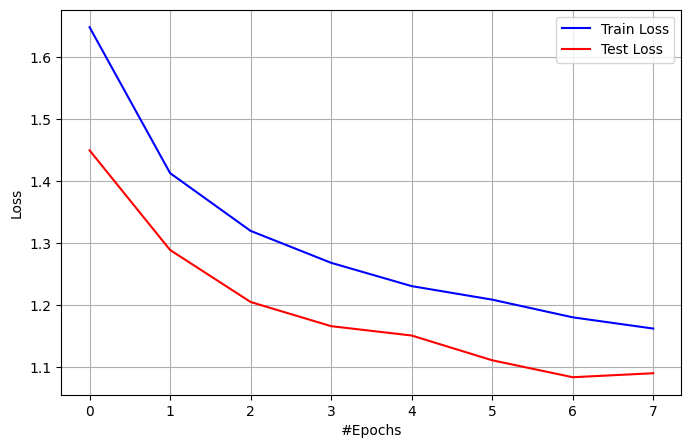

Training complete. Best test loss: 1.0840


In [ ]:
cnn_model = trainAndGraph(model, train_loader, test_loader, loss_fn, optimizer, device, num_epochs=20)

### Evaluation metrics of CNN model

In [ ]:
test_preds, y_test_array, cnn_probs = get_predictions_and_probs(
    cnn_model, test_loader, device
)

In [ ]:
label_names = label_encoder.classes_

# Convert the numerical predictions back to string labels
test_preds_str = label_encoder.inverse_transform(test_preds)

# Now generate the classification report
print(classification_report(
    y_test,
    test_preds_str,
    target_names=label_names
))
computeLabelAccuracy(model, test_loader, device)

              precision    recall  f1-score   support

       angry       0.53      0.48      0.51       991
     disgust       0.83      0.18      0.30       109
        fear       0.48      0.19      0.27      1024
       happy       0.76      0.85      0.80      1798
     neutral       0.52      0.57      0.55      1240
         sad       0.46      0.52      0.49      1216
    surprise       0.58      0.83      0.69       800

    accuracy                           0.59      7178
   macro avg       0.60      0.52      0.51      7178
weighted avg       0.58      0.59      0.57      7178


CNN Accuracy: 4223/7178 (58.8%)


58.83254388409028

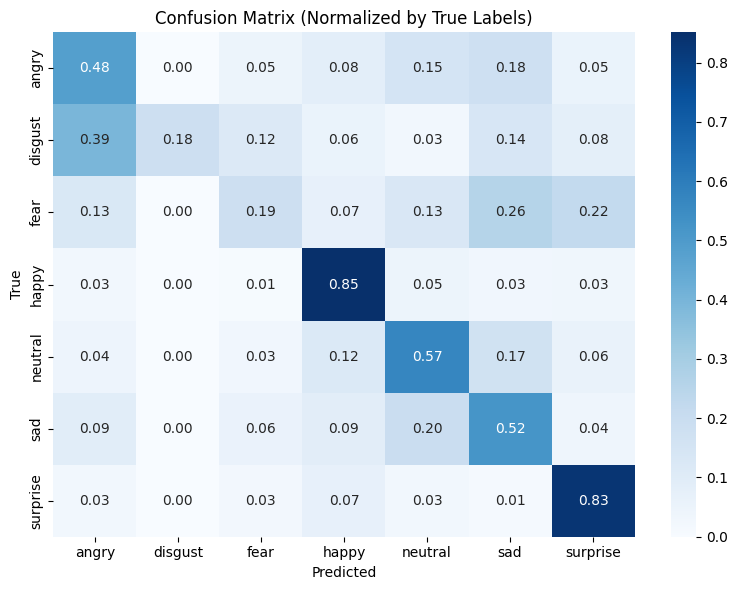

In [ ]:
from sklearn.metrics import confusion_matrix

graphConfusionMatrix(cnn_model, test_loader, label_names, device)

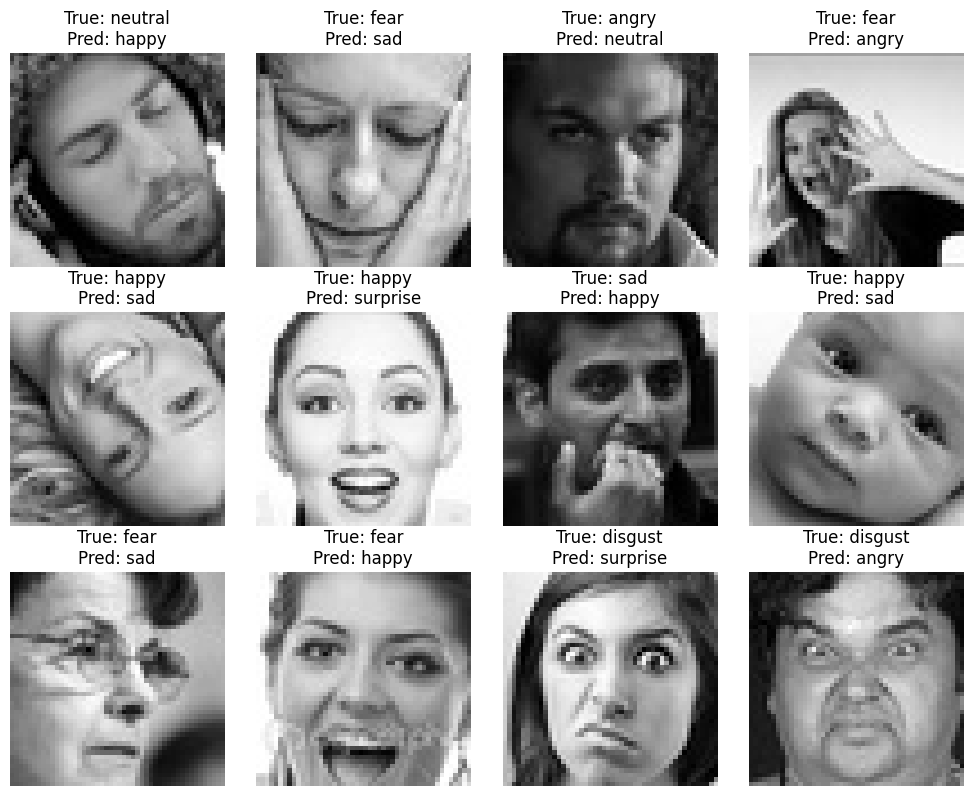

In [ ]:
# Before the loop, convert y_test to its numerical representation for consistent comparison and indexing.
y_test_numerical = label_encoder.transform(y_test)

# Find incorrect predictions by comparing numerical predictions with numerical true labels
incorrect_indices = np.where(test_preds != y_test_numerical)[0]


plt.figure(figsize=(10,8))
for i, idx in enumerate(incorrect_indices[:12]):
    plt.subplot(3,4,i+1)
    plt.imshow(X_2d_test[idx], cmap='gray')

    # Use the numerical y_test to index label_names to get the true label string
    true_label  = label_names[y_test_numerical[idx]]
    pred_label  = label_names[test_preds[idx]]

    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def draw_predictions_emotion(
    model,
    dataset,
    device,
    class_names,
    num_rows=4,
    num_cols=8,
    skip_batches=0,
    batch_size=None
):  #Plot some of the testing results
  model.eval()

  if batch_size is None:
      batch_size = num_rows * num_cols

  # DataLoader just for visualization
  data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
  data_enumerator = enumerate(data_loader)

  # Skip a few batches if desired
  for _ in range(skip_batches):
      try:
          _, (images, labels) = next(data_enumerator)
      except StopIteration:
          print("Skip exceeds number of batches.")
          return

  try:
      _, (images, labels) = next(data_enumerator)
  except StopIteration:
      print("No batches available.")
      return

  images = images.to(device)
  labels = labels.to(device)

  with torch.no_grad():
      logits = model(images)
      pred_labels = logits.argmax(dim=1)

  # Move to CPU for plotting
  images = images.cpu()
  labels = labels.cpu()
  pred_labels = pred_labels.cpu()

  total_to_show = min(batch_size, images.size(0))

  # Loop over rows; each figure = one row
  for row in range(num_rows):
      fig = plt.figure(figsize=(num_cols * 1.8, 3))
      for col in range(num_cols):
          cur = row * num_cols + col
          if cur >= total_to_show:
              break

          plt.subplot(1, num_cols, col + 1)

          img = images[cur]

          # If shape is (1, H, W) -> squeeze channel
          if img.dim() == 3 and img.size(0) == 1:
              img_np = img.squeeze(0).numpy()
              plt.imshow(img_np, cmap="gray")
          else:
              # If somehow RGB, convert to HWC
              img_np = img.numpy()
              img_np = np.transpose(img_np, (1, 2, 0))
              plt.imshow(img_np, cmap="gray")

          true_idx = labels[cur].item()
          pred_idx = pred_labels[cur].item()
          true_name = class_names[true_idx]
          pred_name = class_names[pred_idx]

          color = "green" if true_idx == pred_idx else "red"

          plt.title(f"P: {pred_name}\nT: {true_name}", color=color, fontsize=8)
          plt.axis("off")
          plt.xlabel(f"#{cur}", fontsize=7)

      plt.tight_layout()
      plt.show()

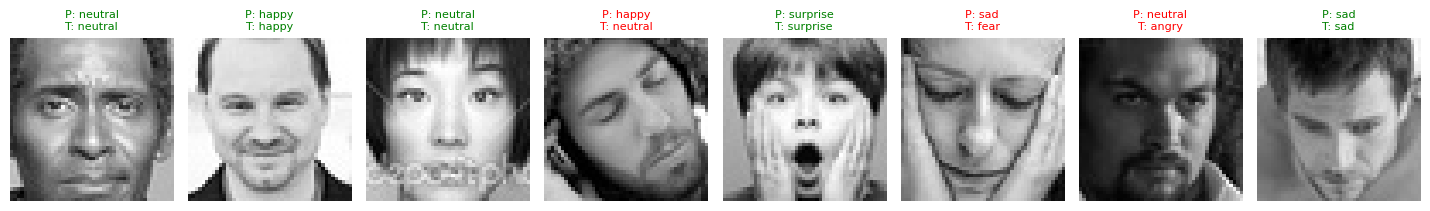

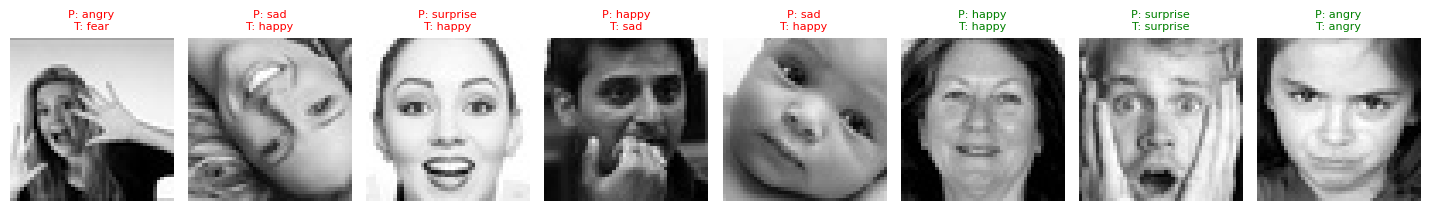

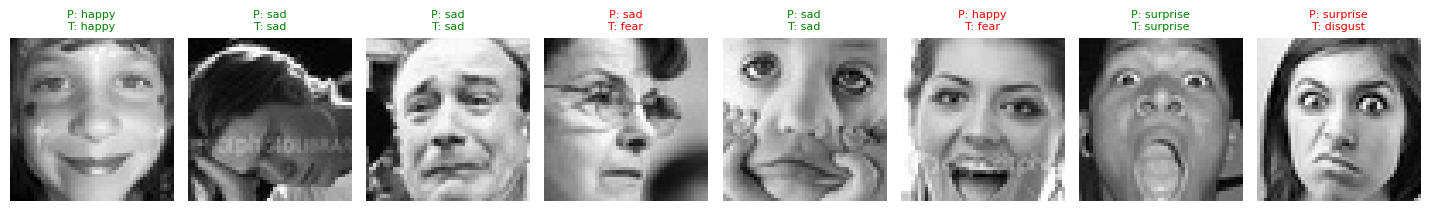

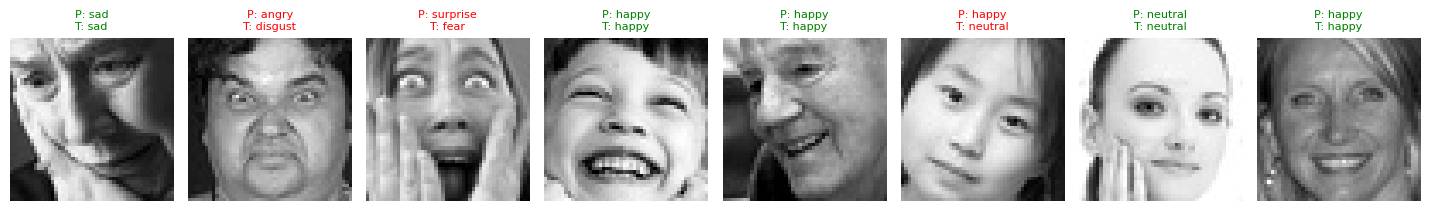

In [ ]:
draw_predictions_emotion(
    cnn_model,
    test_dataset,
    device,
    label_names,
    num_rows=4,
    num_cols=8,
    skip_batches=0
)


Hmm, some odd data points clearly. Look at the first one -- its literally just a clump of pixels rather than a face. Additionally, there are some images with watermarks. There's even an image that looks like a face from a cartoon.

More data preprocessing may need to be done for further analysis. For now, we'll assume these are outliers and don't throw off the model very significantly.

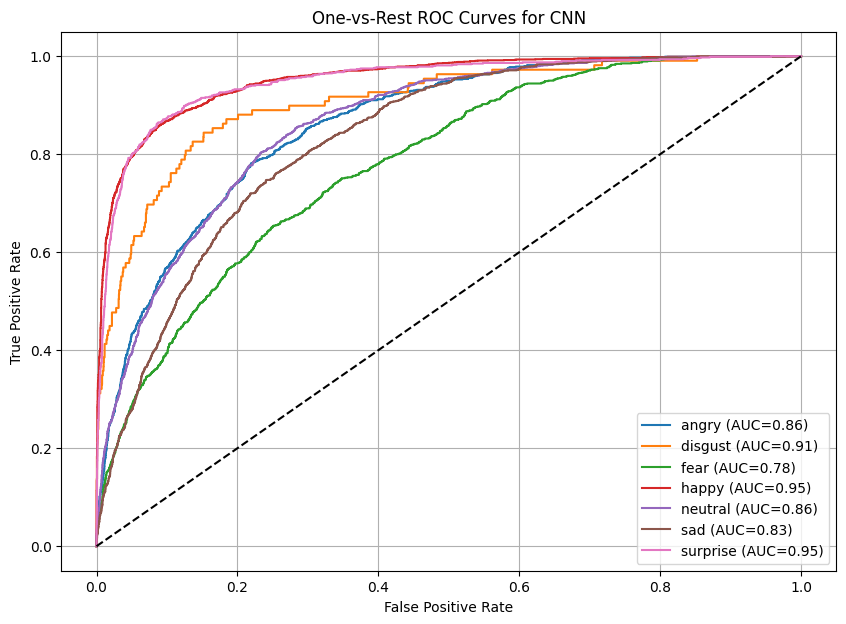

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize test labels
y_test_bin = label_binarize(y_test_array, classes=range(7))

auc_scores = {}   # dictionary to store class → AUC

plt.figure(figsize=(10,7))

for i, emotion in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], cnn_probs[:, i])
    roc_auc = auc(fpr, tpr)

    auc_scores[emotion] = roc_auc  # <-- store the value

    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

# Plot chance line
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for CNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
X_2d_test.shape

(7178, 48, 48)

# Dropping disgust images

This will lead to higher amounts of training data and possibly higher performance due to better generalization on the data

In [ ]:
mask = (y != "disgust")

# Apply mask to all full arrays
X_flat_filtered = X_flat[mask]
X_2d_filtered = X_2d[mask]
y_filtered = y[mask]

# Split into Train/Validation/Test
# y = np.array(emotion_labels)
# X_flat = np.array(flat_img_rows)    # shape: (N, 2304)
# X_2d = np.array(twod_img)           # shape: (N, 48, 48)

# Split into trainval + test
X_flatfilt_trainval, X_flat_test_filtered, \
X_2dfilt_trainval,  X_2d_test_filtered, \
y_filt_trainval,     y_test_filtered = train_test_split(
    X_flat_filtered, X_2d_filtered, y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)

# Split trainval -> train + validation
X_flat_train_filtered, X_flat_val_filtered, \
X_2d_train_filtered,  X_2d_val_filtered, \
y_train_filtered,     y_val_filtered = train_test_split(
    X_flatfilt_trainval, X_2dfilt_trainval, y_filt_trainval,
    test_size=0.25,
    random_state=42,
    stratify=y_filt_trainval
)

# Train/Validation/Test split sets
# X_flat_train_filtered, X_2d_train_filtered, y_train_filtered
# X_flat_val_filtered, X_2d_val_filtered, y_val_filtered
# X_flat_test_filtered, X_2d_test_filtered, y_test_filtered

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to numerical values
labelf_encoder = LabelEncoder()
yf_encoded = labelf_encoder.fit_transform(y_filtered)

##Handling class imbalance

In [ ]:
rusprime = RandomUnderSampler(random_state=42)
X_flat_prime, y_prime = rusprime.fit_resample(X_flat_train_filtered, y_train_filtered)

idx_prime = rusprime.sample_indices_

# Prime is the resampled (balanced) training dataset
# X_flat_prime, X_2d_prime, y_prime
X_flat_prime = X_flat_train_filtered[idx_prime]
X_2d_prime   = X_2d_train_filtered[idx_prime]
y_prime      = y_train_filtered[idx_prime]

In [ ]:
print(X_2d_prime.shape)
print(X_flat_prime.shape)

(14412, 48, 48)
(14412, 2304)


In [ ]:
label_proportion = pd.Series(y_prime).value_counts() / len(X_flat_prime)
label_distribution = label_proportion * len(X_flat_prime)
display(label_distribution, label_proportion)

angry       2402.0
fear        2402.0
happy       2402.0
neutral     2402.0
sad         2402.0
surprise    2402.0
Name: count, dtype: float64

angry       0.166667
fear        0.166667
happy       0.166667
neutral     0.166667
sad         0.166667
surprise    0.166667
Name: count, dtype: float64

## SVM Model

Perfect!! Now we have much more data to train with (~14400 imgs containing 6 facial expression classes). Lets do it all over again.

In [ ]:
# Redefine train_svm_rbf so it doesn't take forever
# We already know best hyperparameters (or at least its approx. range) from previous model
# Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
def retrain_svm_rbf(X_train, y_train, X_val, y_val, X_test, y_test):
    # Optimizing hyperparameters using for loop
    C_vals = [1, 5, 10, 20]
    gamma_vals = ['scale']
    best_f1 = 0
    best_params = None
    best_model = None

    for C in C_vals:
        for gamma in gamma_vals:
            svm = SVC(kernel='rbf', C=C, gamma=gamma, class_weight=None, random_state=42)

            # Train on training set
            svm.fit(X_train, y_train)

            # Evaluate on validation set
            val_preds = svm.predict(X_val)
            f1 = f1_score(y_val, val_preds, average='macro')

            if f1 > best_f1:
                best_f1 = f1
                best_params = {'C': C, 'gamma': gamma, 'kernel': 'rbf'}
                best_model = svm

    print("Best validation F1 (macro):", best_f1)
    print("Best parameters:", best_params)

    if best_model is None or best_params is None:
        return None, None, None

    # Retrain best model on train + val combined
    X_train_full = np.vstack([X_train, X_val])
    y_train_full = np.concatenate([y_train, y_val])

    final_svm = SVC(kernel='rbf',
                    C=best_params['C'],
                    gamma=best_params['gamma'],
                    class_weight=None)
    final_svm.fit(X_train_full, y_train_full)

    # Evaluate on test set
    test_preds = final_svm.predict(X_test)

    return final_svm, best_params, test_preds

Well.... I've waited almost an hour and a half, and the model hasn't even printed best parameters. I'm going to reduce dimensionality using PCA

### PCA dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
# X_flat_prime, X_2d_prime, y_prime
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_flat_prime)
X_val_pca = pca.transform(X_flat_val_filtered)
X_test_pca = pca.transform(X_flat_test_filtered)

print(X_train_pca.shape)

(14412, 254)


In [ ]:
# Train the PCA + SVM (rbf kernel) classifier
svm_rbf_pca, best_params_rbf_pca, rbf_pca_test_preds = retrain_svm_rbf(X_train_pca, y_prime, X_val_pca, y_val_filtered, X_test_pca, y_test_filtered)

Best validation F1 (macro): 0.4243414109692643
Best parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


### Evaluation metrics of SVM (+ PCA)

In [ ]:
# Evaluation on test set
print("\nFinal Test Accuracy:", accuracy_score(y_test_filtered, rbf_pca_test_preds))
print("Classification Report:\n")
print(classification_report(y_test_filtered, rbf_pca_test_preds))

print("Best Hyperparameters:", best_params_rbf_pca)


Final Test Accuracy: 0.4625070741369553
Classification Report:

              precision    recall  f1-score   support

       angry       0.35      0.35      0.35       991
        fear       0.38      0.36      0.37      1024
       happy       0.59      0.59      0.59      1798
     neutral       0.43      0.45      0.44      1240
         sad       0.37      0.36      0.37      1215
    surprise       0.60      0.62      0.61       800

    accuracy                           0.46      7068
   macro avg       0.45      0.46      0.45      7068
weighted avg       0.46      0.46      0.46      7068

Best Hyperparameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


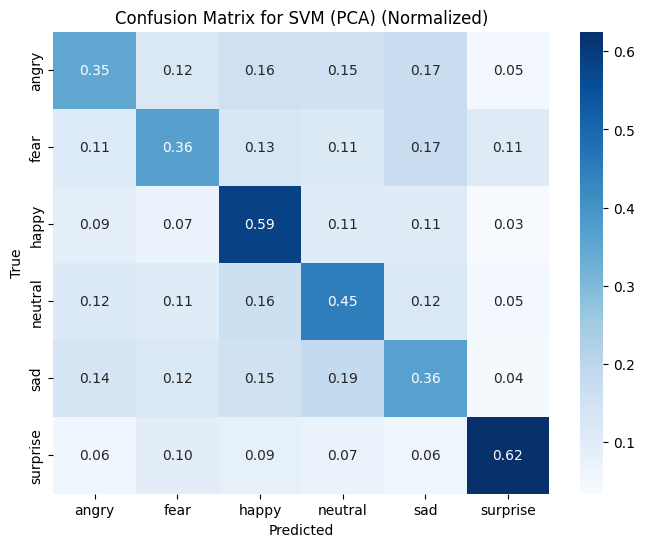

In [ ]:
cm = confusion_matrix(y_test_filtered, rbf_pca_test_preds)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labelf_encoder.classes_,
            yticklabels=labelf_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM (PCA) (Normalized)")
plt.show()

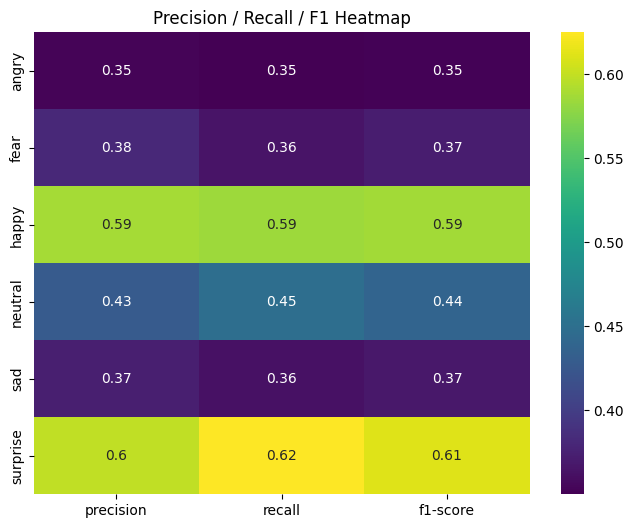

In [ ]:
report = classification_report(y_test_filtered, rbf_pca_test_preds, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:-3, :3], annot=True, cmap="viridis")
plt.title("Precision / Recall / F1 Heatmap")
plt.show()

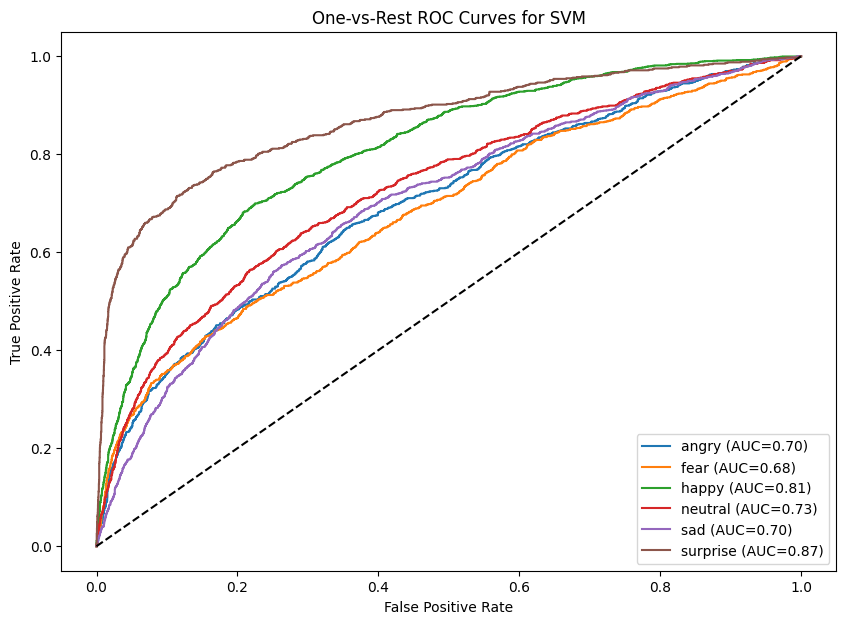

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-vs-all format
y_test_bin = label_binarize(y_test_filtered, classes=np.unique(y_test_filtered))

svm_prob = svm_rbf_pca.decision_function(X_test_pca)

plt.figure(figsize=(10,7))
for i, emotion in enumerate(labelf_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for SVM")
plt.show()

## Neural Network Model

### Load data & augment

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from sklearn.preprocessing import LabelEncoder

# Step 1: Filter out 'disgust' labels
filtered_paths = []
filtered_labels = []

for path, label in zip(image_paths, emotion_labels):
    if label.lower() != 'disgust':  # Case-insensitive comparison
        filtered_paths.append(path)
        filtered_labels.append(label)

print(f"Original dataset size: {len(image_paths)}")
print(f"Filtered dataset size: {len(filtered_paths)}")
print(f"Removed {len(image_paths) - len(filtered_paths)} disgust images")

# Step 2: Load images into numpy arrays
def load_image(path, target_size=(48, 48)):
    """Load and preprocess image"""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, target_size)
    return img

# Load all images
images = []
labels = []
for path, label in zip(filtered_paths, filtered_labels):
    img = load_image(path)
    if img is not None:
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)
print(f"Successfully loaded {len(images)} images")

# Step 3: Data Augmentation Functions
def augment_image(image):
    """Apply random augmentation to a single image"""
    augmented = []

    # Original image
    augmented.append(image)

    # Horizontal flip
    augmented.append(cv2.flip(image, 1))

    # Small rotation (-15 to 15 degrees)
    angle = np.random.uniform(-15, 15)
    h, w = image.shape
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    augmented.append(rotated)

    # Brightness adjustment
    brightness_factor = np.random.uniform(0.8, 1.2)
    brightened = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
    augmented.append(brightened)

    return augmented

# Step 4: Apply augmentation to training data
def augment_dataset(images, labels, augmentation_factor=2):
    """
    Augment the dataset
    augmentation_factor: how many augmented versions per image (1-4)
    """
    aug_images = []
    aug_labels = []

    for img, label in zip(images, labels):
        augmented = augment_image(img)
        # Take original + augmentation_factor additional versions
        for i in range(min(augmentation_factor + 1, len(augmented))):
            aug_images.append(augmented[i])
            aug_labels.append(label)

    return np.array(aug_images), np.array(aug_labels)

label_encoder = LabelEncoder()
label_encoder.fit(labels)

print("Label Encoding Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name}: {i}")

# Step 5: Train-Test Split (before augmentation to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels  # Ensures balanced classes in both sets
)

print(f"\nBefore augmentation:")
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

# Step 6: Apply augmentation ONLY to training data
X_train_aug, y_train_aug = augment_dataset(X_train, y_train, augmentation_factor=2)

print(f"\nAfter augmentation:")
print(f"Train size: {len(X_train_aug)}")
print(f"Test size: {len(X_test)} (unchanged)")

# Step 7: Verify class distribution
unique_train, counts_train = np.unique(y_train_aug, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nTrain set class distribution:")
for label, count in zip(unique_train, counts_train):
    print(f"  {label}: {count}")

print("\nTest set class distribution:")
for label, count in zip(unique_test, counts_test):
    print(f"  {label}: {count}")

# Final data ready for your dataset classes
X_2d_train = X_train_aug
y_train = y_train_aug
X_2d_test = X_test
y_test = y_test

Original dataset size: 35887
Filtered dataset size: 35340
Removed 547 disgust images
Successfully loaded 35340 images
Label Encoding Mapping:
  angry: 0
  fear: 1
  happy: 2
  neutral: 3
  sad: 4
  surprise: 5

Before augmentation:
Train size: 28272
Test size: 7068

After augmentation:
Train size: 84816
Test size: 7068 (unchanged)

Train set class distribution:
  angry: 11886
  fear: 12291
  happy: 21573
  neutral: 14874
  sad: 14586
  surprise: 9606

Test set class distribution:
  angry: 991
  fear: 1024
  happy: 1798
  neutral: 1240
  sad: 1215
  surprise: 800


### Define model and dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class NNEmotionDataset(Dataset):
    def __init__(self, images, labels, label_encoder):
        self.images = images
        # Encode categorical labels to numerical values
        self.labels = label_encoder.transform(labels)

        # Define transformations for the images for MLP model
        self.transform = transforms.Compose([
            transforms.ToTensor(), # Converts a PIL Image or numpy.ndarray (H x W x C) to a torch.FloatTensor of shape (C x H x W). For grayscale, (1 x H x W).
            transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1] for a single channel image
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert image to a PyTorch tensor and apply transformations
        # Assuming images are already grayscale NumPy arrays (H, W)
        image_tensor = self.transform(image)

        # Convert label to PyTorch tensor of type long
        label_tensor = torch.tensor(label, dtype=torch.long)

        return image_tensor, label_tensor

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create module instance
class MLP(nn.Module):
    def __init__(self, img_w, img_h, num_classes):
        super(MLP, self).__init__()
        self.img_w = img_w
        self.img_h = img_h
        self.flat_size = img_w * img_h
        self.num_classes = num_classes
        self.linear1 = nn.Linear(self.flat_size, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.linear2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(64, num_classes)


    def forward(self, x):
        x = x.view(-1, self.flat_size)
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

### Training and testing functions

In [ ]:
def trainNN(model,  data_generator, loss_function, optimizer):
  model.train() #updates any model layers that behave differently in training and execution
  avg_loss = 0
  num_batches = 0
  for i, (input_data, target_output) in enumerate(data_generator):
    optimizer.zero_grad()                            # Gradients need to be reset each batch
    prediction = model(input_data)                 # Forward pass: compute the output class given a image
    loss = loss_function(prediction, target_output)  # Compute the loss: difference between the output and correct result
    loss.backward()                                  # Backward pass: compute the gradients of the model with respect to the loss
    optimizer.step()
    avg_loss += loss.item()
    num_batches += 1
  return avg_loss/num_batches

def testNN(model, test_loader, loss_function):
  model.eval() #updates any model layers that behave differently in training and execution
  test_loss = 0
  num_batches = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += loss_function(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      num_batches += 1
  test_loss /= num_batches
  #print('\nTest set: Avg. loss: {:.4f})\n'.format(test_loss))
  return test_loss

def logResultsNN(epoch, num_epochs, train_loss, train_loss_history, test_loss, test_loss_history, epoch_counter, print_interval=1000):
  if (epoch%print_interval == 0):  print('Epoch [%d/%d], Train Loss: %.4f, Test Loss: %.4f' %(epoch+1, num_epochs, train_loss, test_loss))
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  epoch_counter.append(epoch)

def graphLossNN(epoch_counter, train_loss_hist, test_loss_hist, loss_name="Loss", start = 0):
  fig = plt.figure()
  plt.plot(epoch_counter[start:], train_loss_hist[start:], color='blue')
  plt.plot(epoch_counter[start:], test_loss_hist[start:], color='red')
  plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
  plt.xlabel('#Epochs')
  plt.ylabel(loss_name)

def trainAndGraphNN(model, training_generator, testing_generator, loss_function, optimizer, num_epochs, learning_rate, logging_interval=1):
  #Arrays to store training history
  test_loss_history = []
  epoch_counter = []
  train_loss_history = []

  for epoch in range(num_epochs):
    avg_loss = trainNN(model, training_generator, loss_function, optimizer)
    test_loss = testNN(model, testing_generator, loss_function)
    logResultsNN(epoch, num_epochs, avg_loss, train_loss_history, test_loss, test_loss_history, epoch_counter, logging_interval)

  graphLossNN(epoch_counter, train_loss_history, test_loss_history)

### Train NN model

In [ ]:
training_dataset = NNEmotionDataset(X_2d_train, y_train, label_encoder)
testing_dataset = NNEmotionDataset(X_2d_test, y_test, label_encoder)

Loaded Data
Epoch [1/30], Train Loss: 1.6601, Test Loss: 1.5917
Epoch [6/30], Train Loss: 1.4808, Test Loss: 1.4832
Epoch [11/30], Train Loss: 1.4193, Test Loss: 1.4506
Epoch [16/30], Train Loss: 1.3807, Test Loss: 1.4318
Epoch [21/30], Train Loss: 1.3475, Test Loss: 1.4347
Epoch [26/30], Train Loss: 1.3230, Test Loss: 1.4236


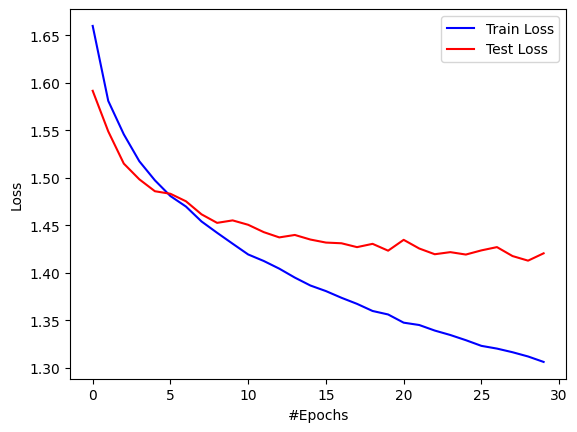

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#Training parameters
num_epochs = 30
print_interval = 5
learning_rate = 0.001
batch_size = 512

image_w = 48
image_h = 48

pred_model = MLP(image_w, image_h, num_classes=6)

#Eval Class Weights
y_train_encoded = label_encoder.transform(y_train_aug)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)


#Optimizer and loss function
model = pred_model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
loss_function = nn.CrossEntropyLoss(weight=class_weights_tensor)

#Load data and split into batches
training_generator = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
testing_generator = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size)

print("Loaded Data")

trainAndGraphNN(model, training_generator, testing_generator, loss_function, optimizer, num_epochs, learning_rate, print_interval)

### Evaluate model

In [ ]:
def evaluate_per_class(model, test_loader, label_encoder):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1)
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)

    print("\nPer-class accuracy:")
    for i, class_name in enumerate(label_encoder.classes_):
        class_mask = all_targets == i
        if class_mask.sum() > 0:
            accuracy = (all_preds[class_mask] == all_targets[class_mask]).mean()
            print(f"  {class_name}: {accuracy:.3f} ({class_mask.sum()} samples)")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    accuracy_score,
    precision_recall_fscore_support
)
from sklearn.preprocessing import label_binarize
import torch

def evaluate_model(model, test_loader, label_encoder, num_classes=6):
    """
    Comprehensive model evaluation with multiple metrics
    """
    model.eval()
    all_preds = []
    all_targets = []
    all_probs = []

    # Collect predictions and targets
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            probs = torch.softmax(output, dim=1)  # Get probabilities
            pred = output.argmax(dim=1)

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)
    all_probs = np.array(all_probs)

    # 1. Overall Accuracy
    accuracy = accuracy_score(all_targets, all_preds)
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("="*60)

    # 2. Classification Report (Precision, Recall, F1-Score)
    print("\nClassification Report:")
    print(classification_report(
        all_targets,
        all_preds,
        target_names=label_encoder.classes_,
        digits=4
    ))

    # 3. Per-Class Accuracy
    print("\nPer-Class Accuracy:")
    for i, class_name in enumerate(label_encoder.classes_):
        class_mask = all_targets == i
        if class_mask.sum() > 0:
            class_accuracy = (all_preds[class_mask] == all_targets[class_mask]).mean()
            print(f"  {class_name:12s}: {class_accuracy:.4f} ({class_mask.sum()} samples)")

    # 4. Confusion Matrix
    plot_confusion_matrix(all_targets, all_preds, label_encoder.classes_)

    # 5. ROC Curves and AUC
    plot_roc_curves(all_targets, all_probs, label_encoder.classes_, num_classes)

    # 6. ROC AUC Scores
    print("\nROC AUC Scores (One-vs-Rest):")
    try:
        # Binarize targets for multi-class ROC AUC
        targets_binarized = label_binarize(all_targets, classes=range(num_classes))

        # Macro average (equal weight to each class)
        macro_auc = roc_auc_score(targets_binarized, all_probs, average='macro')
        print(f"  Macro Average: {macro_auc:.4f}")

        # Weighted average (weight by class support)
        weighted_auc = roc_auc_score(targets_binarized, all_probs, average='weighted')
        print(f"  Weighted Average: {weighted_auc:.4f}")

        # Per-class AUC
        for i, class_name in enumerate(label_encoder.classes_):
            class_auc = roc_auc_score(targets_binarized[:, i], all_probs[:, i])
            print(f"  {class_name:12s}: {class_auc:.4f}")
    except Exception as e:
        print(f"  Could not compute AUC: {e}")

    return all_preds, all_targets, all_probs


def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot confusion matrix as a heatmap
    """
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12)
    ax1.set_xlabel('Predicted Label', fontsize=12)

    # Normalized (percentages)
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax2)
    ax2.set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=12)
    ax2.set_xlabel('Predicted Label', fontsize=12)

    plt.tight_layout()
    plt.show()


def plot_roc_curves(y_true, y_probs, class_names, num_classes):
    """
    Plot ROC curves for all classes (One-vs-Rest)
    """
    # Binarize the targets
    y_true_binarized = label_binarize(y_true, classes=range(num_classes))

    fig, ax = plt.subplots(figsize=(10, 8))

    colors = plt.cm.Set3(np.linspace(0, 1, num_classes))

    # Plot ROC curve for each class
    for i, (class_name, color) in enumerate(zip(class_names, colors)):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)

        ax.plot(fpr, tpr, color=color, lw=2,
                label=f'{class_name} (AUC = {roc_auc:.3f})')

    # Plot diagonal (random classifier)
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_title('ROC Curves (One-vs-Rest)', fontsize=14, fontweight='bold')
    ax.legend(loc="lower right", fontsize=10)
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_top_k_accuracy(y_true, y_probs, class_names, k_values=[1, 2, 3]):
    """
    Plot top-k accuracy (useful for multi-class problems)
    """
    top_k_accs = []

    for k in k_values:
        top_k_preds = np.argsort(y_probs, axis=1)[:, -k:]
        correct = np.array([y_true[i] in top_k_preds[i] for i in range(len(y_true))])
        top_k_acc = correct.mean()
        top_k_accs.append(top_k_acc)
        print(f"Top-{k} Accuracy: {top_k_acc:.4f}")

    plt.figure(figsize=(8, 5))
    plt.bar(k_values, top_k_accs, color='steelblue', alpha=0.7)
    plt.xlabel('K', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Top-K Accuracy', fontsize=14, fontweight='bold')
    plt.xticks(k_values)
    plt.ylim([0, 1])
    plt.grid(axis='y', alpha=0.3)

    for i, (k, acc) in enumerate(zip(k_values, top_k_accs)):
        plt.text(k, acc + 0.02, f'{acc:.3f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()


def analyze_misclassifications(y_true, y_pred, y_probs, class_names, top_n=10):
    """
    Analyze the most common misclassifications
    """
    misclassified_mask = y_true != y_pred
    misclassified_indices = np.where(misclassified_mask)[0]

    print(f"\nTotal Misclassifications: {len(misclassified_indices)} / {len(y_true)} ({100*len(misclassified_indices)/len(y_true):.2f}%)")

    # Find most common confusion pairs
    confusion_pairs = {}
    for idx in misclassified_indices:
        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        pair = (true_label, pred_label)
        confusion_pairs[pair] = confusion_pairs.get(pair, 0) + 1

    # Sort by frequency
    sorted_pairs = sorted(confusion_pairs.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTop {top_n} Most Common Misclassifications:")
    print(f"{'True Label':<12} {'→'} {'Predicted':<12} {'Count'}")
    print("-" * 45)
    for (true_label, pred_label), count in sorted_pairs[:top_n]:
        print(f"{true_label:<12} → {pred_label:<12} {count}")

Overall Accuracy: 0.4404

Classification Report:
              precision    recall  f1-score   support

       angry     0.3250    0.3663    0.3444       991
        fear     0.3459    0.2246    0.2724      1024
       happy     0.6605    0.5400    0.5942      1798
     neutral     0.4271    0.4016    0.4140      1240
         sad     0.3181    0.4626    0.3769      1215
    surprise     0.5538    0.6112    0.5811       800

    accuracy                         0.4404      7068
   macro avg     0.4384    0.4344    0.4305      7068
weighted avg     0.4560    0.4404    0.4421      7068


Per-Class Accuracy:
  angry       : 0.3663 (991 samples)
  fear        : 0.2246 (1024 samples)
  happy       : 0.5400 (1798 samples)
  neutral     : 0.4016 (1240 samples)
  sad         : 0.4626 (1215 samples)
  surprise    : 0.6112 (800 samples)


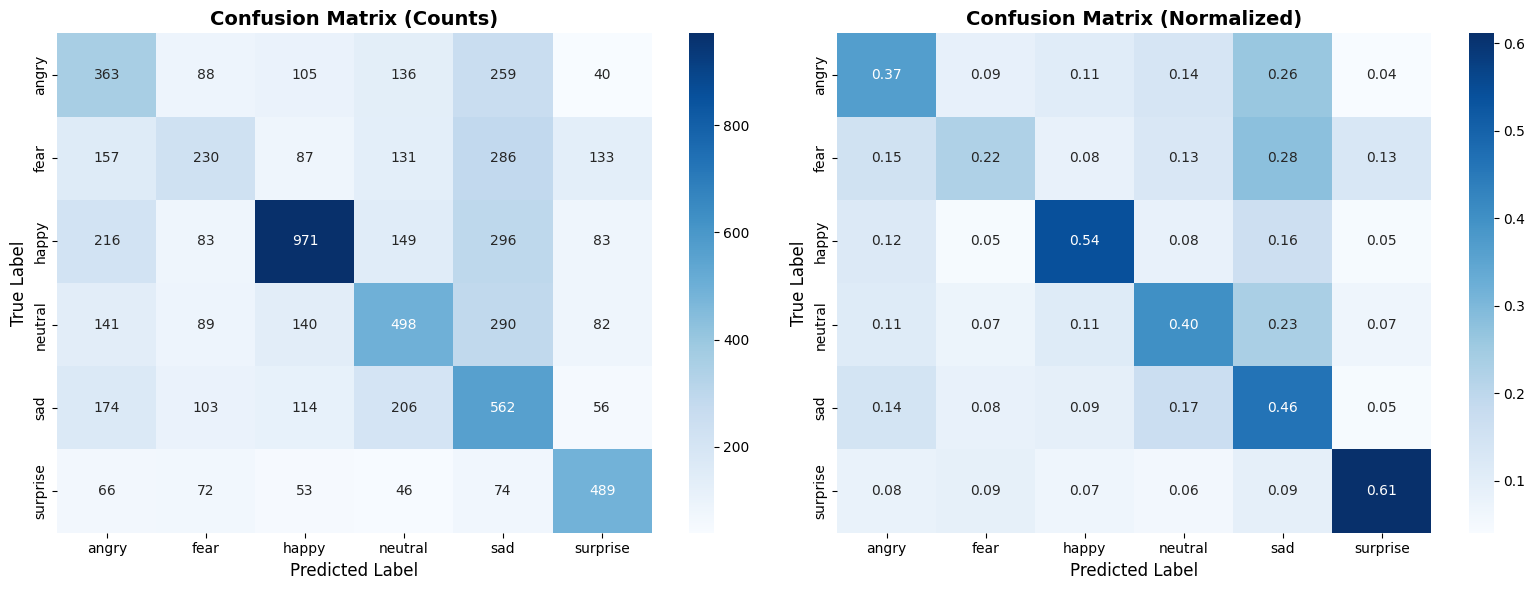

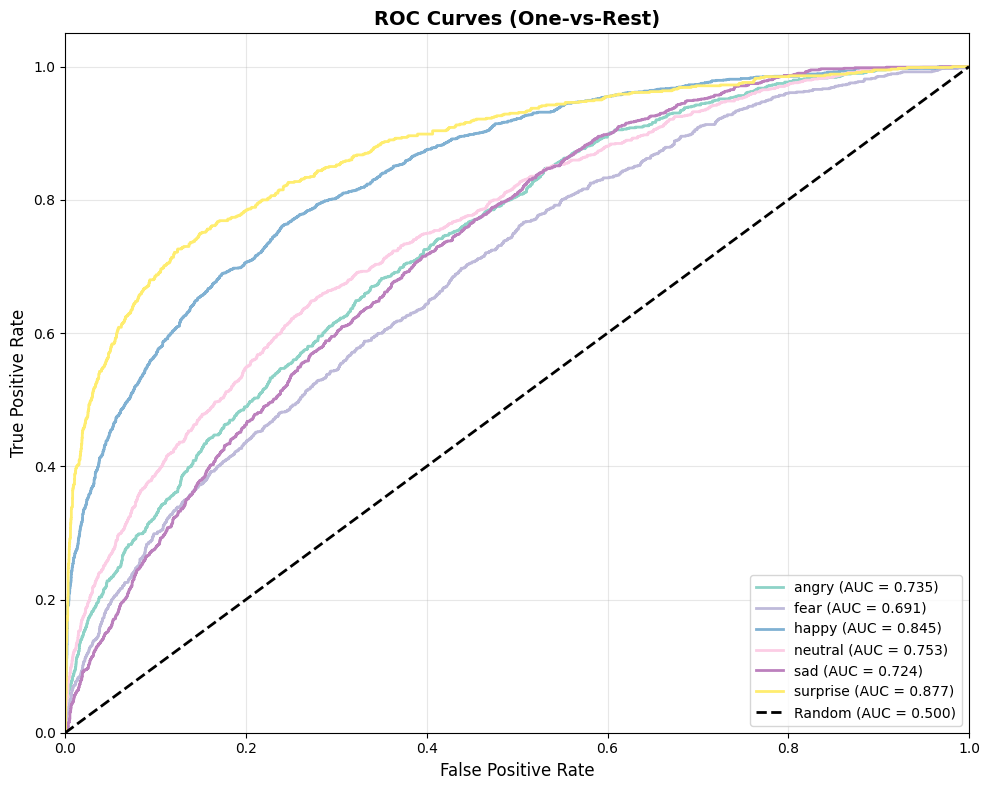


ROC AUC Scores (One-vs-Rest):
  Macro Average: 0.7707
  Weighted Average: 0.7738
  angry       : 0.7350
  fear        : 0.6907
  happy       : 0.8445
  neutral     : 0.7530
  sad         : 0.7239
  surprise    : 0.8774


In [ ]:
preds, targets, probs = evaluate_model(model, testing_generator, label_encoder, num_classes=6)

Top-1 Accuracy: 0.4404
Top-2 Accuracy: 0.6391
Top-3 Accuracy: 0.7810


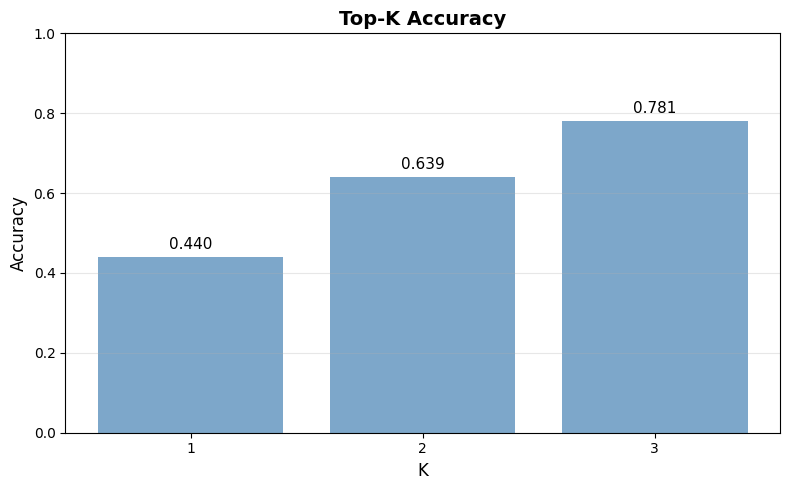


Total Misclassifications: 3955 / 7068 (55.96%)

Top 10 Most Common Misclassifications:
True Label   → Predicted    Count
---------------------------------------------
happy        → sad          296
neutral      → sad          290
fear         → sad          286
angry        → sad          259
happy        → angry        216
sad          → neutral      206
sad          → angry        174
fear         → angry        157
happy        → neutral      149
neutral      → angry        141


In [ ]:
plot_top_k_accuracy(targets, probs, label_encoder.classes_, k_values=[1, 2, 3])
analyze_misclassifications(targets, preds, probs, label_encoder.classes_, top_n=10)

### Prediction confidence

In [ ]:
def analyze_prediction_confidence(model, test_loader, label_encoder, X_test, num_classes=6):
    """
    Find most and least confident predictions for each class
    """
    model.eval()
    all_preds = []
    all_targets = []
    all_probs = []
    all_indices = []

    # Collect all predictions with their indices
    idx = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            probs = torch.softmax(output, dim=1)
            pred = output.argmax(dim=1)

            batch_size = data.size(0)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_indices.extend(range(idx, idx + batch_size))
            idx += batch_size

    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)
    all_probs = np.array(all_probs)
    all_indices = np.array(all_indices)

    # Get confidence scores (max probability for predicted class)
    confidence_scores = np.max(all_probs, axis=1)

    # Analyze for each class
    class_confidence_data = {}

    for class_idx, class_name in enumerate(label_encoder.classes_):
        # Get all samples where true label is this class
        class_mask = all_targets == class_idx

        if class_mask.sum() == 0:
            continue

        class_indices = all_indices[class_mask]
        class_preds = all_preds[class_mask]
        class_targets = all_targets[class_mask]
        class_probs = all_probs[class_mask]
        class_confidences = confidence_scores[class_mask]

        # Separate correct and incorrect predictions
        correct_mask = class_preds == class_targets
        incorrect_mask = ~correct_mask

        class_confidence_data[class_name] = {
            'all_indices': class_indices,
            'all_preds': class_preds,
            'all_probs': class_probs,
            'all_confidences': class_confidences,
            'correct_mask': correct_mask,
            'incorrect_mask': incorrect_mask
        }

    return class_confidence_data, all_preds, all_targets, all_probs


def visualize_confidence_extremes(class_confidence_data, label_encoder, X_test, num_examples=3):
    """
    Visualize most and least confident predictions for each class
    """
    num_classes = len(label_encoder.classes_)

    fig, axes = plt.subplots(num_classes, num_examples * 2, figsize=(4 * num_examples * 2, 4 * num_classes))

    if num_classes == 1:
        axes = axes.reshape(1, -1)

    for class_idx, class_name in enumerate(label_encoder.classes_):
        data = class_confidence_data[class_name]

        indices = data['all_indices']
        preds = data['all_preds']
        probs = data['all_probs']
        confidences = data['all_confidences']
        correct_mask = data['correct_mask']

        # Most confident CORRECT predictions
        if correct_mask.sum() > 0:
            correct_indices = indices[correct_mask]
            correct_confidences = confidences[correct_mask]
            correct_probs = probs[correct_mask]

            # Sort by confidence (descending)
            sorted_idx = np.argsort(correct_confidences)[::-1]
            most_confident_correct = sorted_idx[:num_examples]

            for i in range(num_examples):
                ax = axes[class_idx, i]

                if i < len(most_confident_correct):
                    img_idx = correct_indices[most_confident_correct[i]]
                    img = X_test[img_idx]
                    conf = correct_confidences[most_confident_correct[i]]
                    prob_dist = correct_probs[most_confident_correct[i]]

                    ax.imshow(img, cmap='gray')
                    ax.set_title(f'✓ Conf: {conf:.3f}', color='green', fontweight='bold')
                    ax.axis('off')

                    # Add probability distribution as text
                    prob_text = '\n'.join([f'{label_encoder.classes_[j]}: {prob_dist[j]:.2f}'
                                          for j in range(len(label_encoder.classes_))])
                    ax.text(0.02, 0.98, prob_text, transform=ax.transAxes,
                           fontsize=7, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
                else:
                    ax.axis('off')
        else:
            for i in range(num_examples):
                axes[class_idx, i].axis('off')

        # Least confident CORRECT predictions (or most confident INCORRECT if no correct ones)
        if correct_mask.sum() > 0:
            sorted_idx = np.argsort(correct_confidences)  # Ascending
            least_confident_correct = sorted_idx[:num_examples]

            for i in range(num_examples):
                ax = axes[class_idx, num_examples + i]

                if i < len(least_confident_correct):
                    img_idx = correct_indices[least_confident_correct[i]]
                    img = X_test[img_idx]
                    conf = correct_confidences[least_confident_correct[i]]
                    prob_dist = correct_probs[least_confident_correct[i]]

                    ax.imshow(img, cmap='gray')
                    ax.set_title(f'✓ Conf: {conf:.3f}', color='orange', fontweight='bold')
                    ax.axis('off')

                    prob_text = '\n'.join([f'{label_encoder.classes_[j]}: {prob_dist[j]:.2f}'
                                          for j in range(len(label_encoder.classes_))])
                    ax.text(0.02, 0.98, prob_text, transform=ax.transAxes,
                           fontsize=7, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
                else:
                    ax.axis('off')
        else:
            # If no correct predictions, show most confident incorrect ones
            incorrect_mask = data['incorrect_mask']
            if incorrect_mask.sum() > 0:
                incorrect_indices = indices[incorrect_mask]
                incorrect_confidences = confidences[incorrect_mask]
                incorrect_preds = preds[incorrect_mask]
                incorrect_probs = probs[incorrect_mask]

                sorted_idx = np.argsort(incorrect_confidences)[::-1]
                most_confident_incorrect = sorted_idx[:num_examples]

                for i in range(num_examples):
                    ax = axes[class_idx, num_examples + i]

                    if i < len(most_confident_incorrect):
                        img_idx = incorrect_indices[most_confident_incorrect[i]]
                        img = X_test[img_idx]
                        conf = incorrect_confidences[most_confident_incorrect[i]]
                        pred_class = label_encoder.classes_[incorrect_preds[most_confident_incorrect[i]]]
                        prob_dist = incorrect_probs[most_confident_incorrect[i]]

                        ax.imshow(img, cmap='gray')
                        ax.set_title(f'✗ Pred: {pred_class}\nConf: {conf:.3f}',
                                   color='red', fontweight='bold', fontsize=9)
                        ax.axis('off')

                        prob_text = '\n'.join([f'{label_encoder.classes_[j]}: {prob_dist[j]:.2f}'
                                              for j in range(len(label_encoder.classes_))])
                        ax.text(0.02, 0.98, prob_text, transform=ax.transAxes,
                               fontsize=7, verticalalignment='top',
                               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
                    else:
                        ax.axis('off')
            else:
                for i in range(num_examples):
                    axes[class_idx, num_examples + i].axis('off')

        # Add class label on the left
        axes[class_idx, 0].text(-0.1, 0.5, class_name.upper(),
                               transform=axes[class_idx, 0].transAxes,
                               fontsize=14, fontweight='bold',
                               rotation=90, verticalalignment='center')

    # Add column headers
    fig.text(0.3, 0.98, 'MOST CONFIDENT (Correct)', ha='center', fontsize=16, fontweight='bold')
    fig.text(0.7, 0.98, 'LEAST CONFIDENT (Correct)', ha='center', fontsize=16, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


def print_confidence_statistics(class_confidence_data, label_encoder):
    """
    Print confidence statistics for each class
    """
    print("\n" + "="*70)
    print("CONFIDENCE STATISTICS PER CLASS")
    print("="*70)

    for class_name in label_encoder.classes_:
        data = class_confidence_data[class_name]

        confidences = data['all_confidences']
        correct_mask = data['correct_mask']

        total = len(confidences)
        num_correct = correct_mask.sum()
        accuracy = num_correct / total if total > 0 else 0

        print(f"\n{class_name.upper()}:")
        print(f"  Total samples: {total}")
        print(f"  Accuracy: {accuracy:.4f} ({num_correct}/{total})")

        if num_correct > 0:
            correct_confidences = confidences[correct_mask]
            print(f"  Correct predictions:")
            print(f"    Mean confidence: {correct_confidences.mean():.4f}")
            print(f"    Max confidence:  {correct_confidences.max():.4f}")
            print(f"    Min confidence:  {correct_confidences.min():.4f}")
            print(f"    Std confidence:  {correct_confidences.std():.4f}")

        if (~correct_mask).sum() > 0:
            incorrect_confidences = confidences[~correct_mask]
            print(f"  Incorrect predictions:")
            print(f"    Mean confidence: {incorrect_confidences.mean():.4f}")
            print(f"    Max confidence:  {incorrect_confidences.max():.4f}")
            print(f"    Min confidence:  {incorrect_confidences.min():.4f}")


def find_extreme_examples(class_confidence_data, label_encoder, X_test):
    """
    Find and return the single most/least confident example for each class
    """
    extreme_examples = {}

    for class_name in label_encoder.classes_:
        data = class_confidence_data[class_name]

        indices = data['all_indices']
        confidences = data['all_confidences']
        correct_mask = data['correct_mask']
        probs = data['all_probs']

        if correct_mask.sum() > 0:
            correct_indices = indices[correct_mask]
            correct_confidences = confidences[correct_mask]
            correct_probs = probs[correct_mask]

            # Most confident
            most_conf_idx = np.argmax(correct_confidences)
            most_conf_img_idx = correct_indices[most_conf_idx]

            # Least confident
            least_conf_idx = np.argmin(correct_confidences)
            least_conf_img_idx = correct_indices[least_conf_idx]

            extreme_examples[class_name] = {
                'most_confident': {
                    'index': most_conf_img_idx,
                    'image': X_test[most_conf_img_idx],
                    'confidence': correct_confidences[most_conf_idx],
                    'probs': correct_probs[most_conf_idx]
                },
                'least_confident': {
                    'index': least_conf_img_idx,
                    'image': X_test[least_conf_img_idx],
                    'confidence': correct_confidences[least_conf_idx],
                    'probs': correct_probs[least_conf_idx]
                }
            }

    return extreme_examples

In [ ]:
# Analyze confidence
class_confidence_data, preds, targets, probs = analyze_prediction_confidence(
    model, testing_generator, label_encoder, X_test, num_classes=6
)


CONFIDENCE STATISTICS PER CLASS

ANGRY:
  Total samples: 991
  Accuracy: 0.3663 (363/991)
  Correct predictions:
    Mean confidence: 0.4330
    Max confidence:  0.9502
    Min confidence:  0.1865
    Std confidence:  0.1755
  Incorrect predictions:
    Mean confidence: 0.3475
    Max confidence:  0.9785
    Min confidence:  0.1811

FEAR:
  Total samples: 1024
  Accuracy: 0.2246 (230/1024)
  Correct predictions:
    Mean confidence: 0.4371
    Max confidence:  0.9838
    Min confidence:  0.1884
    Std confidence:  0.1755
  Incorrect predictions:
    Mean confidence: 0.3846
    Max confidence:  0.9998
    Min confidence:  0.1821

HAPPY:
  Total samples: 1798
  Accuracy: 0.5400 (971/1798)
  Correct predictions:
    Mean confidence: 0.6249
    Max confidence:  0.9986
    Min confidence:  0.1824
    Std confidence:  0.2537
  Incorrect predictions:
    Mean confidence: 0.3322
    Max confidence:  0.9860
    Min confidence:  0.1748

NEUTRAL:
  Total samples: 1240
  Accuracy: 0.4016 (498/12

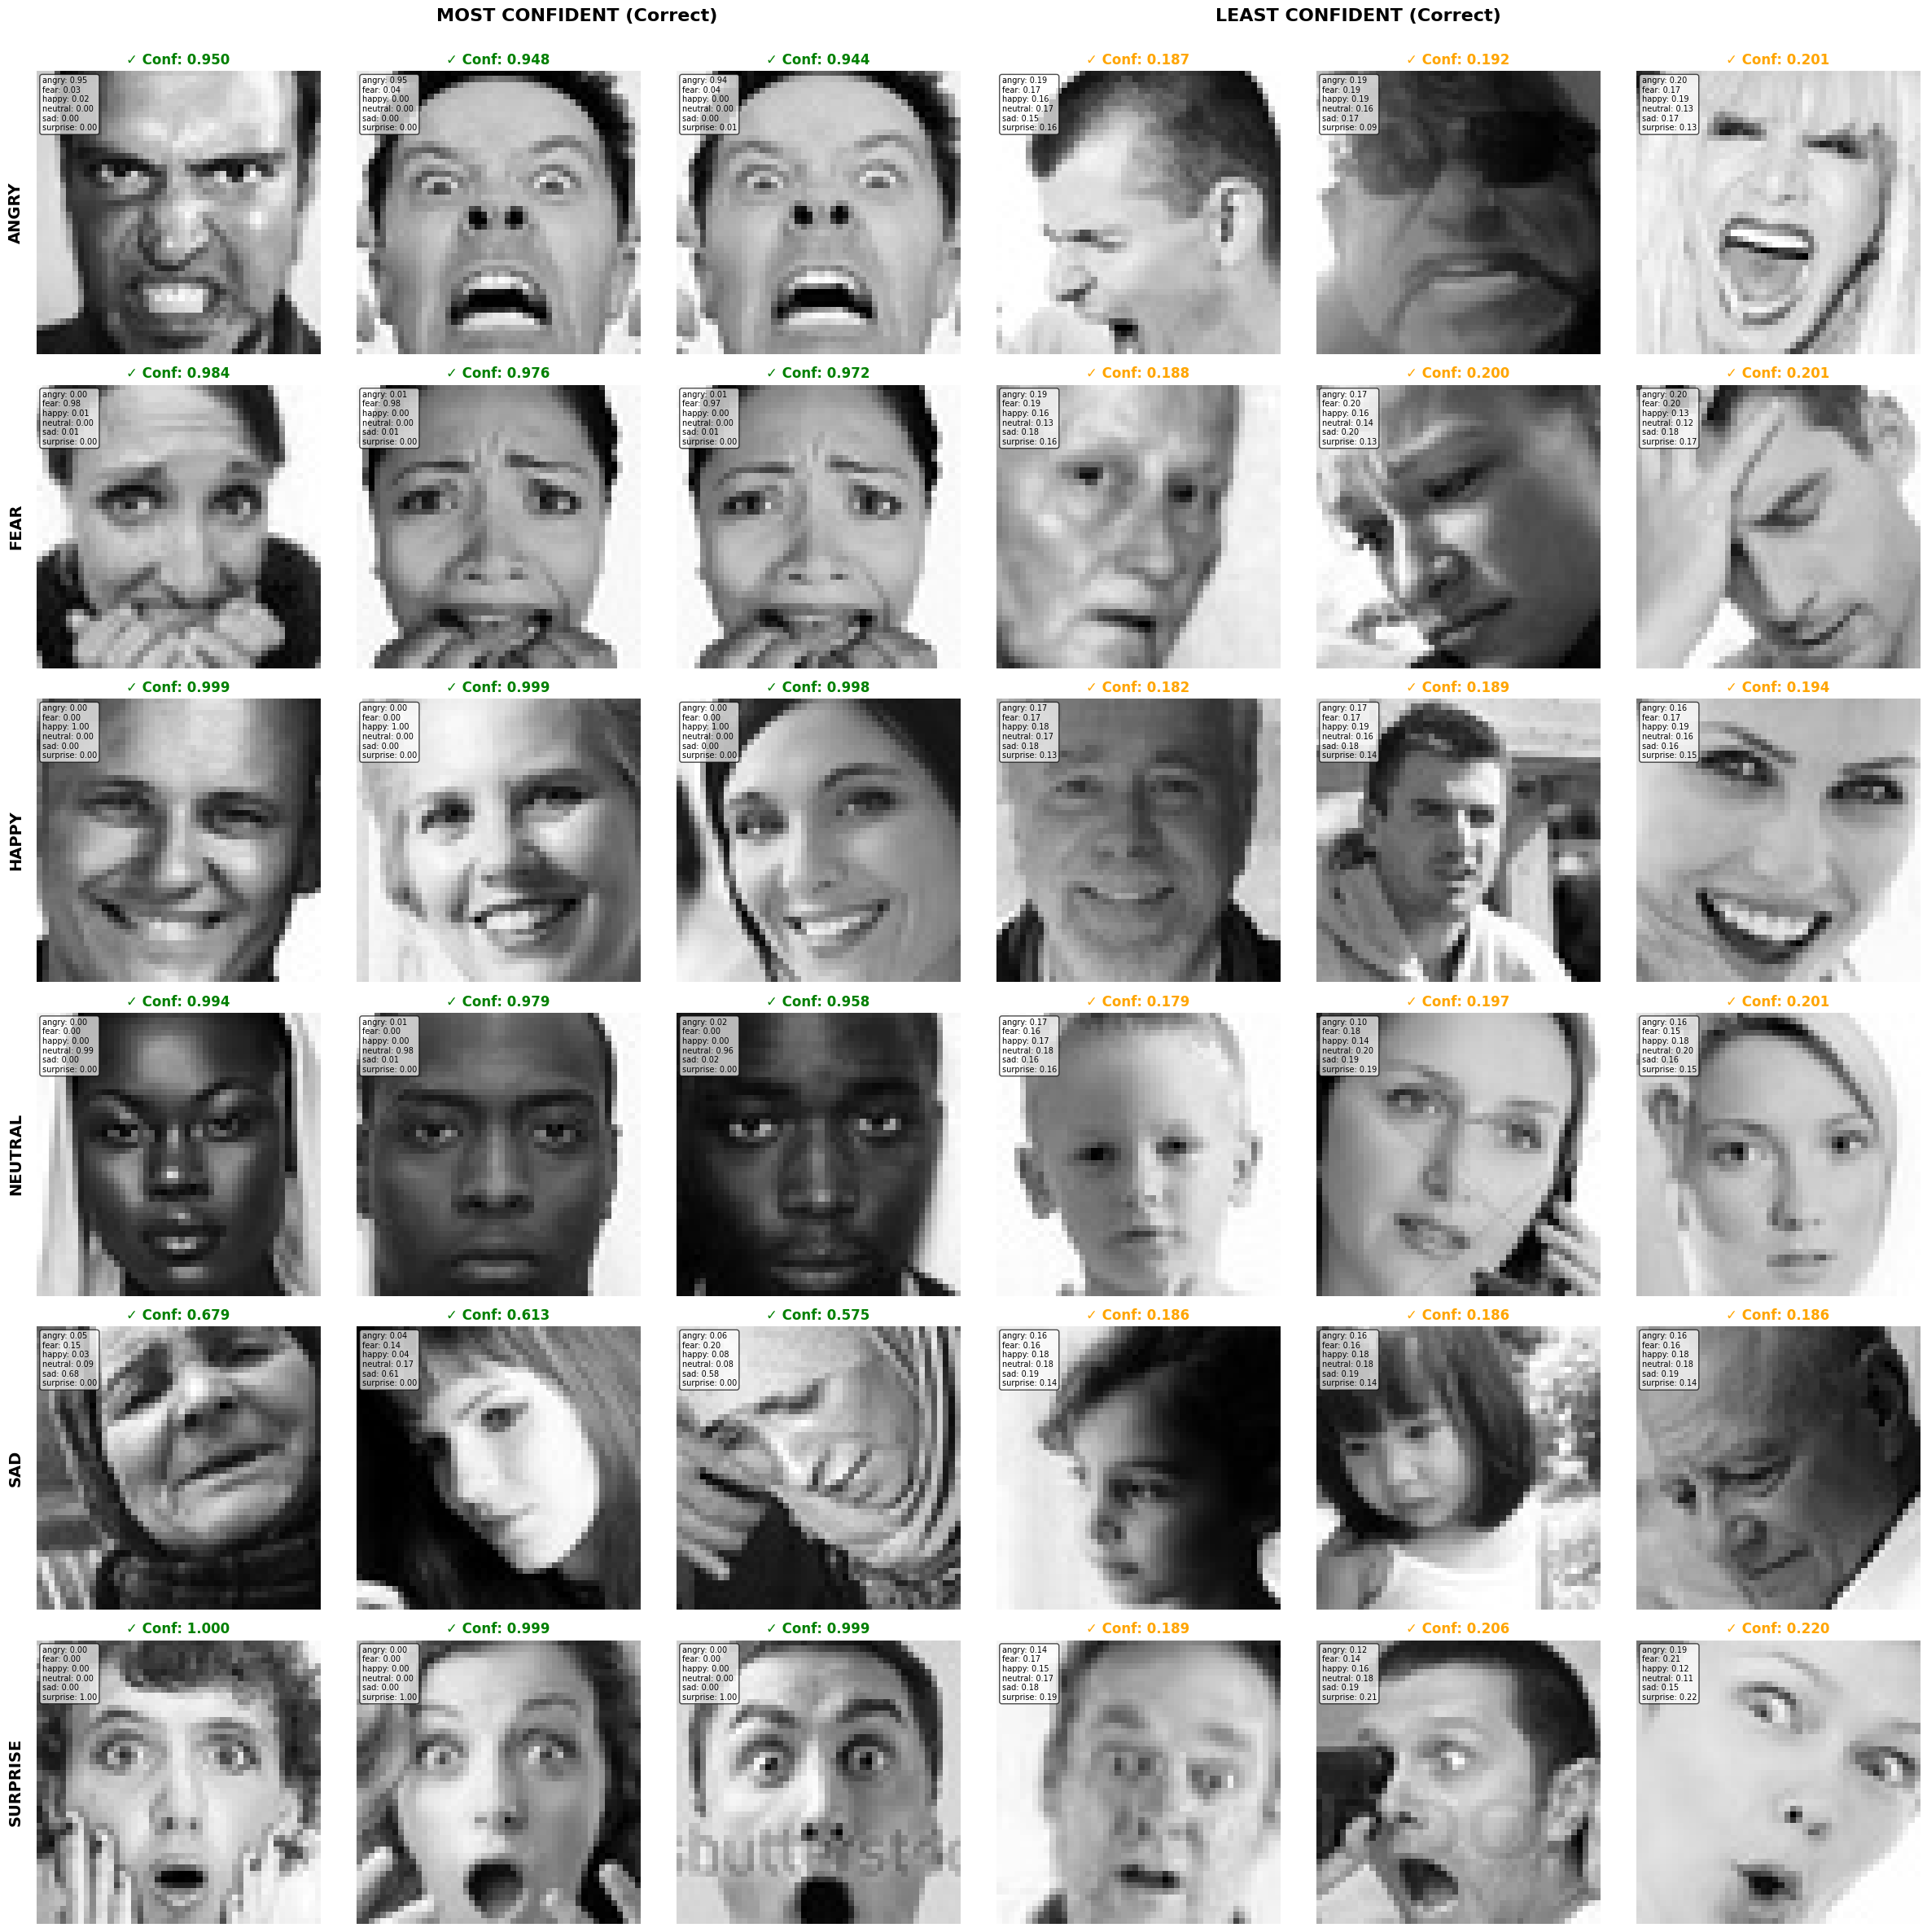

In [ ]:
# Print statistics
print_confidence_statistics(class_confidence_data, label_encoder)

# Visualize extreme examples (3 most confident, 3 least confident per class)
visualize_confidence_extremes(class_confidence_data, label_encoder, X_test, num_examples=3)

# Get single most/least confident for each class
extreme_examples = find_extreme_examples(class_confidence_data, label_encoder, X_test)

## Convolutional Neural Network Model

### Preparing filtered data for CNN

In [ ]:
X_2d_combined_train = np.concatenate([X_2d_train_filtered, X_2d_val_filtered], axis=0)
y_combined = np.concatenate([y_train_filtered, y_val_filtered], axis=0)

# Build tensor datasets using previous split sets (same ones from SVM)
train_dataset = CNNEmotionDataset(X_2d_combined_train, y_combined, labelf_encoder, is_train=True, augmentation=augmentation_emotion)
test_dataset = CNNEmotionDataset(X_2d_test_filtered, y_test_filtered, labelf_encoder)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN_Emotion(num_classes=6).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)

Starting training...
Batch [100/442], Loss: 1.7619
Batch [200/442], Loss: 1.7009
Batch [300/442], Loss: 1.6561
Batch [400/442], Loss: 1.6171
Epoch [1/20], Train Loss: 1.6042, Test Loss: 1.4611
Batch [100/442], Loss: 1.4219
Batch [200/442], Loss: 1.4070
Batch [300/442], Loss: 1.3928
Batch [400/442], Loss: 1.3836
Epoch [2/20], Train Loss: 1.3759, Test Loss: 1.2349
Batch [100/442], Loss: 1.2938
Batch [200/442], Loss: 1.2919
Batch [300/442], Loss: 1.2814
Batch [400/442], Loss: 1.2781
Epoch [3/20], Train Loss: 1.2754, Test Loss: 1.1749
Batch [100/442], Loss: 1.2402
Batch [200/442], Loss: 1.2306
Batch [300/442], Loss: 1.2350
Batch [400/442], Loss: 1.2275
Epoch [4/20], Train Loss: 1.2259, Test Loss: 1.1630
Batch [100/442], Loss: 1.1978
Batch [200/442], Loss: 1.2028
Batch [300/442], Loss: 1.2054
Batch [400/442], Loss: 1.1995
Epoch [5/20], Train Loss: 1.1989, Test Loss: 1.1244
Batch [100/442], Loss: 1.1691
Batch [200/442], Loss: 1.1670
Batch [300/442], Loss: 1.1674
Batch [400/442], Loss: 1.1645

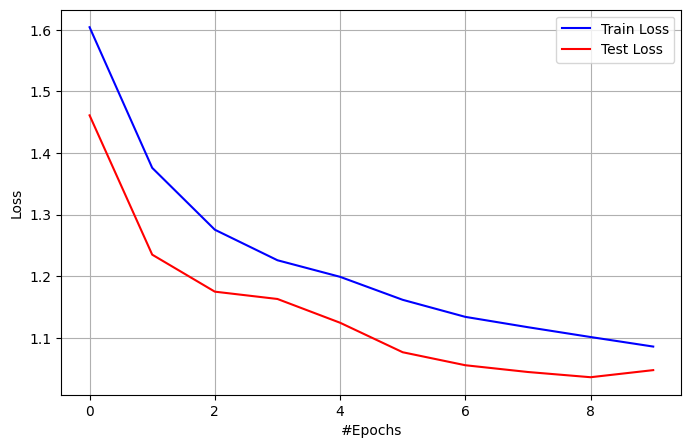

Training complete. Best test loss: 1.0359


In [ ]:
cnn_resampled_model = trainAndGraph(model, train_loader, test_loader, loss_fn, optimizer, device, num_epochs=20)

### Evaluate CNN model

In [ ]:
test_preds, y_test_array, cnn_resampled_probs = get_predictions_and_probs(
    cnn_resampled_model, test_loader, device
)

In [ ]:
# Use the label_encoder from the filtered data (labelf_encoder)
# and the filtered test set (y_test_filtered)
y_test_encoded = labelf_encoder.transform(y_test_filtered)

# Now generate the classification report
print(classification_report(
    y_test_encoded,
    test_preds,
    target_names=labelf_encoder.classes_
))
computeLabelAccuracy(cnn_resampled_model, test_loader, device)

              precision    recall  f1-score   support

       angry       0.55      0.52      0.53       991
        fear       0.43      0.29      0.35      1024
       happy       0.87      0.76      0.81      1798
     neutral       0.56      0.57      0.56      1240
         sad       0.46      0.58      0.51      1215
    surprise       0.62      0.82      0.71       800

    accuracy                           0.60      7068
   macro avg       0.58      0.59      0.58      7068
weighted avg       0.61      0.60      0.60      7068


CNN Accuracy: 4244/7068 (60.0%)


60.04527447651387

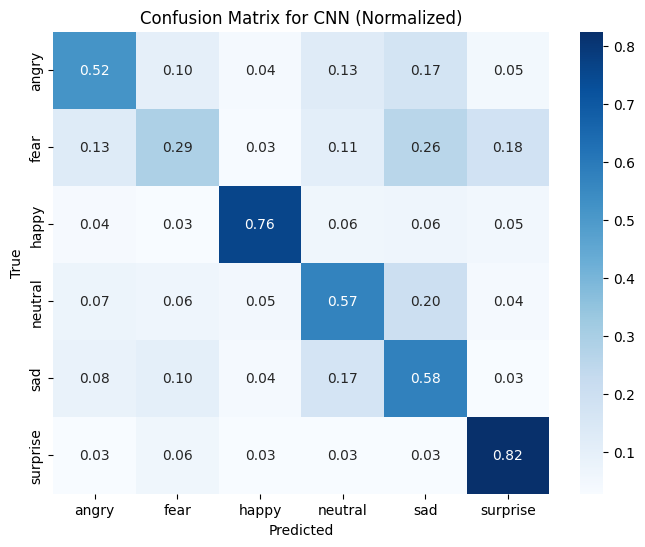

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labelf_encoder.transform(y_test_filtered), test_preds)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labelf_encoder.classes_,
            yticklabels=labelf_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN (Normalized)")
plt.show()

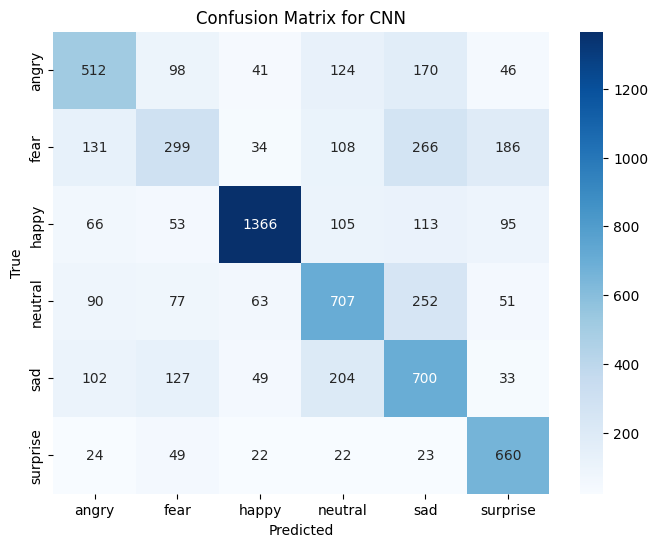

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labelf_encoder.transform(y_test_filtered), test_preds)
# Normalize confusion matrix
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labelf_encoder.classes_,
            yticklabels=labelf_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN")
plt.show()

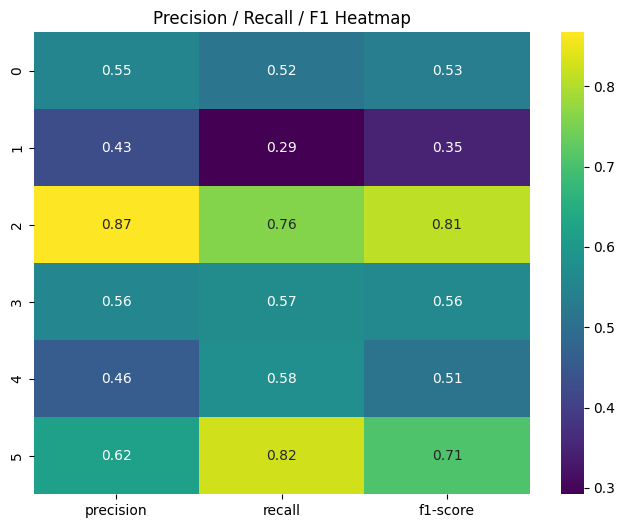

In [ ]:
report = classification_report(labelf_encoder.transform(y_test_filtered), test_preds, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:-3, :3], annot=True, cmap="viridis")
plt.title("Precision / Recall / F1 Heatmap")
plt.show()

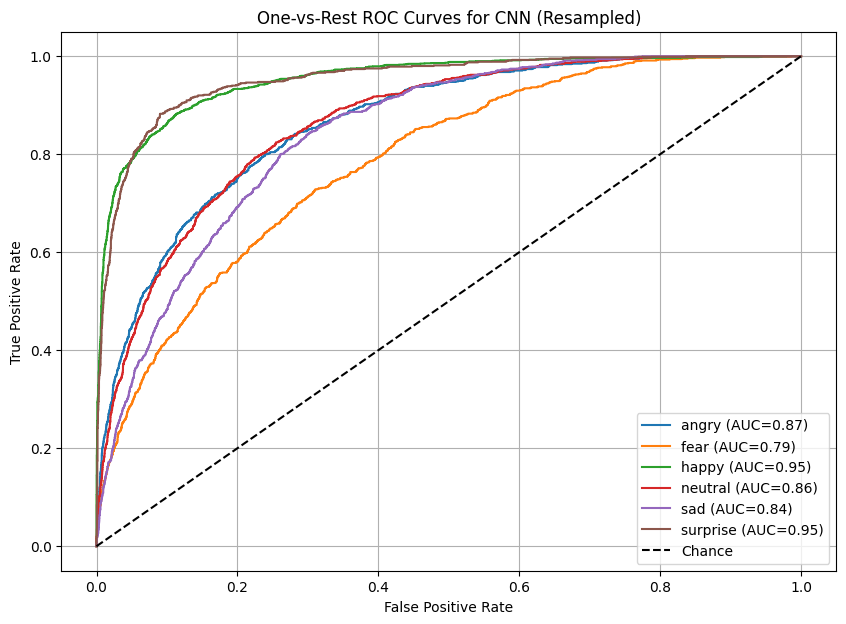

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = 6
y_test_bin = label_binarize(y_test_array, classes=list(range(n_classes)))

plt.figure(figsize=(10,7))

auc_scores = {}

for i, emotion in enumerate(labelf_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], cnn_resampled_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[emotion] = roc_auc

    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves for CNN (Resampled)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

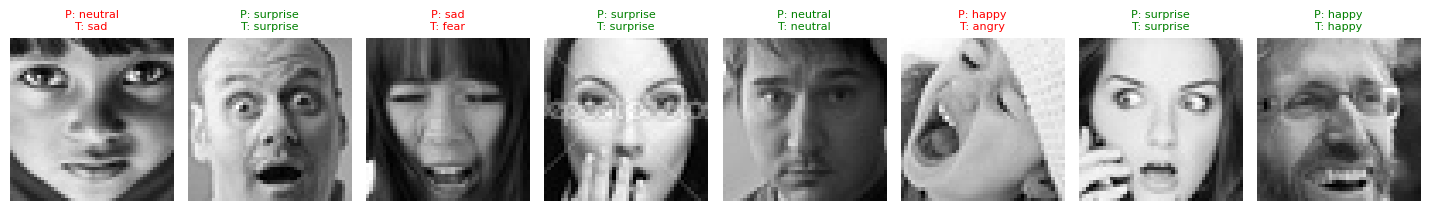

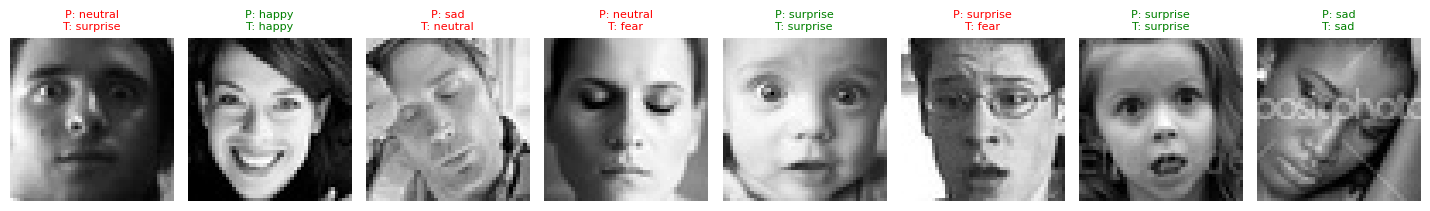

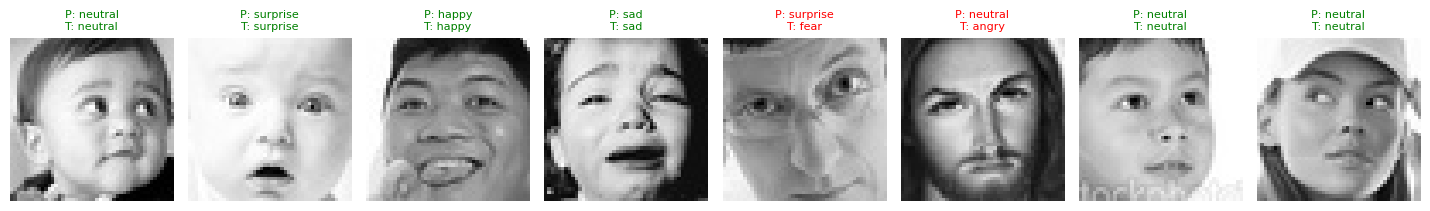

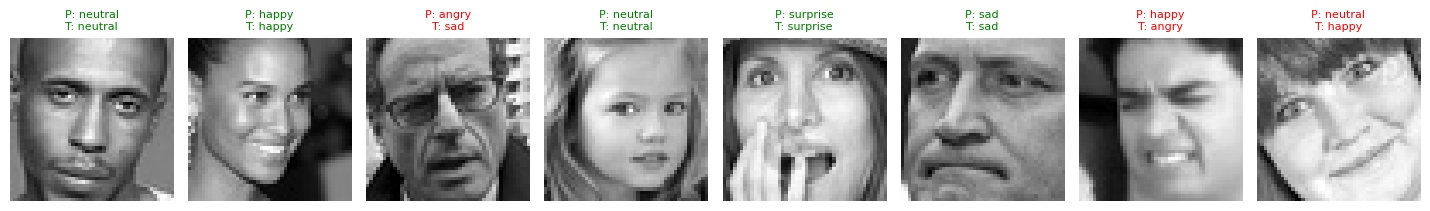

In [ ]:
draw_predictions_emotion(
    cnn_resampled_model,
    test_dataset,
    device,
    labelf_encoder.classes_,
    num_rows=4,
    num_cols=8,
    skip_batches=0
)


### Evaluate CNN confidence

In [64]:
# Analyze confidence
class_confidence_data, preds, targets, probs = analyze_prediction_confidence(
    cnn_resampled_model, test_loader, labelf_encoder, X_2d_test_filtered, num_classes=6
)

In [65]:
# Print statistics
print_confidence_statistics(class_confidence_data, labelf_encoder)


CONFIDENCE STATISTICS PER CLASS

ANGRY:
  Total samples: 991
  Accuracy: 0.5166 (512/991)
  Correct predictions:
    Mean confidence: 0.5611
    Max confidence:  0.9842
    Min confidence:  0.2181
    Std confidence:  0.1711
  Incorrect predictions:
    Mean confidence: 0.4470
    Max confidence:  0.9791
    Min confidence:  0.2107

FEAR:
  Total samples: 1024
  Accuracy: 0.2920 (299/1024)
  Correct predictions:
    Mean confidence: 0.5072
    Max confidence:  0.9645
    Min confidence:  0.1949
    Std confidence:  0.1450
  Incorrect predictions:
    Mean confidence: 0.5077
    Max confidence:  0.9914
    Min confidence:  0.2102

HAPPY:
  Total samples: 1798
  Accuracy: 0.7597 (1366/1798)
  Correct predictions:
    Mean confidence: 0.8214
    Max confidence:  0.9995
    Min confidence:  0.2347
    Std confidence:  0.1896
  Incorrect predictions:
    Mean confidence: 0.4613
    Max confidence:  0.9943
    Min confidence:  0.2181

NEUTRAL:
  Total samples: 1240
  Accuracy: 0.5702 (707/1

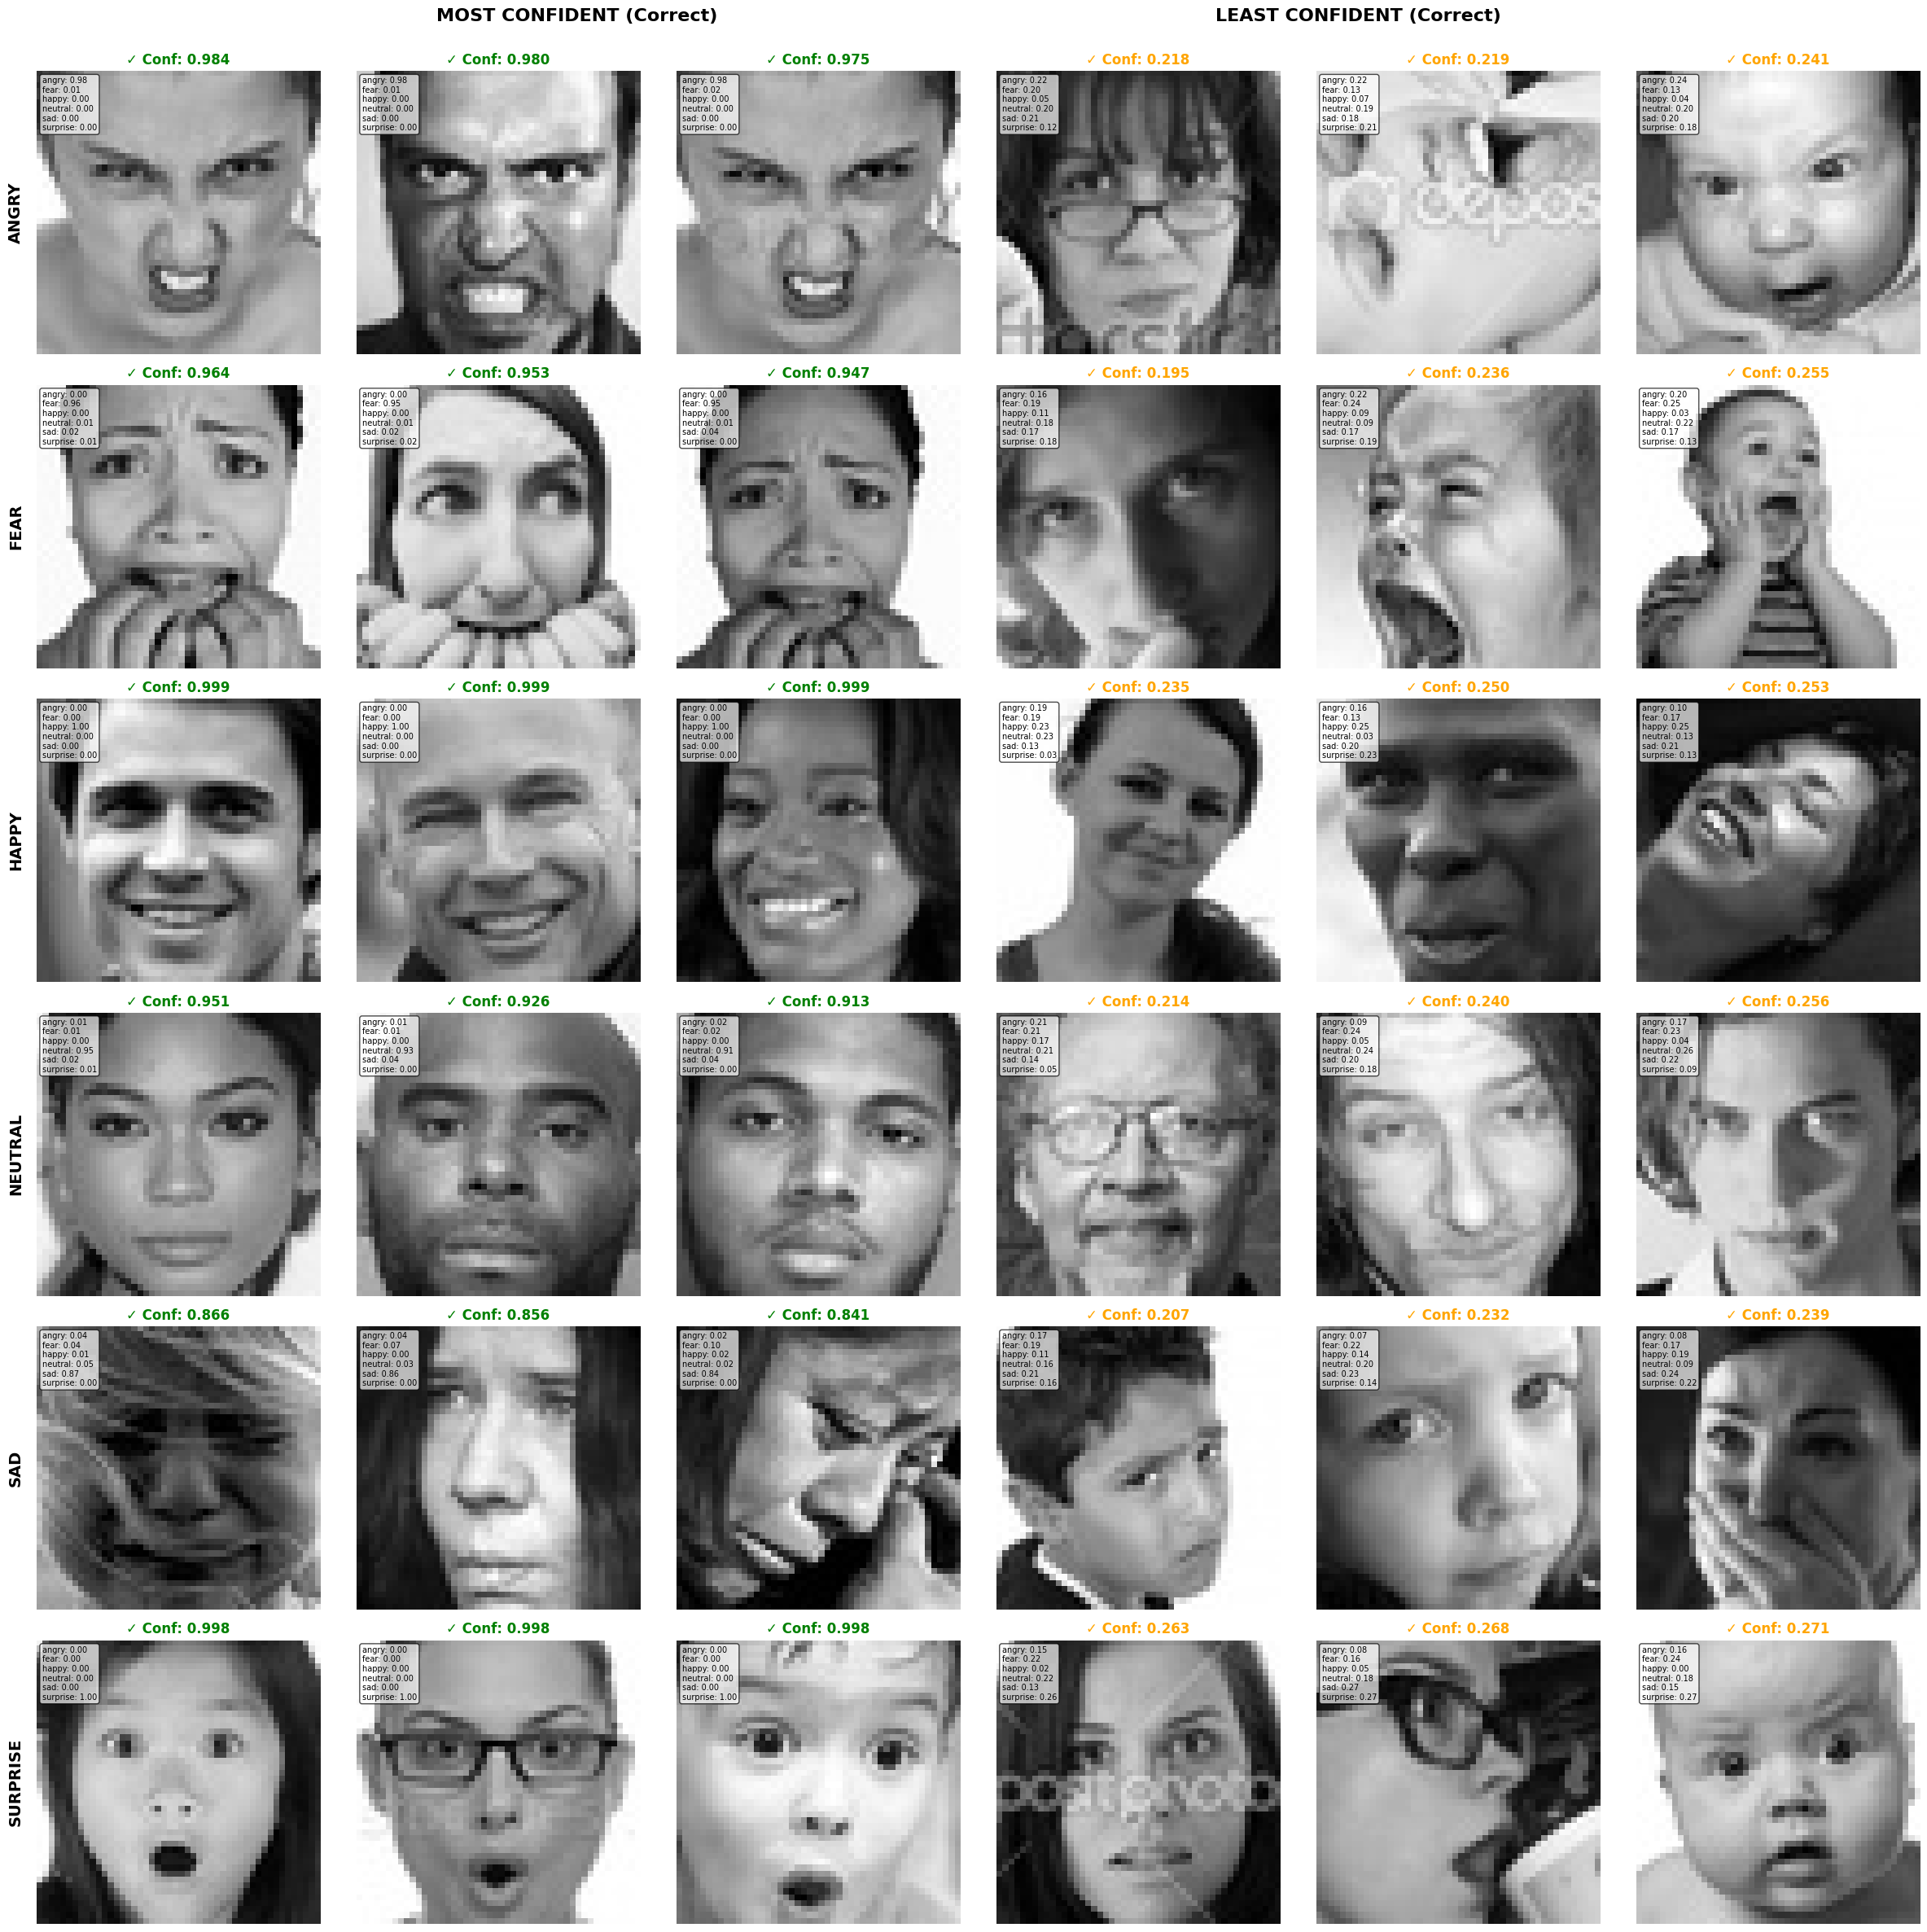

In [67]:
# Visualize extreme examples (3 most confident, 3 least confident per class)
visualize_confidence_extremes(class_confidence_data, labelf_encoder, X_2d_test_filtered, num_examples=3)

In [66]:
# Get single most/least confident for each class
extreme_examples = find_extreme_examples(class_confidence_data, labelf_encoder, X_2d_test_filtered)
# print(extreme_examples)

## ResNet model [Extra Credit]

### Preparing data

In [68]:
from torchvision import models, transforms
# Use ImageNet normalization for ResNet
data_transform = transforms.Compose([
    transforms.ToPILImage(), # Convert tensor/array to PIL Image
    # ResNet needs 3 color channels. We'll handle this manually below.
    transforms.ToTensor(), # Converts to a Tensor and scales to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models, transforms
import numpy as np

In [70]:
class ResNetDataset(torch.utils.data.Dataset):
    def __init__(self, X_data, y_data, label_encoder, transform=None):
        # Use the provided label_encoder to transform y_data
        self.y_encoded = label_encoder.transform(y_data)

        # Convert X_data to uint8 for ToPILImage and add a channel dimension
        # (N, 48, 48) -> (N, 48, 48, 1)
        self.X = (X_data).astype(np.uint8)
        self.y = torch.tensor(self.y_encoded, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # Get the 48x48 image
        image = self.X[idx]

        # Manually convert 1-channel (grayscale) to 3-channel (RGB) by stacking
        # (48, 48) -> (48, 48, 3) for ToPILImage to correctly handle
        image_3channel = np.stack([image, image, image], axis=2)

        # Apply the transformations
        if self.transform:
            image_tensor = self.transform(image_3channel)
        else:
            image_tensor = torch.from_numpy(image_3channel).permute(2, 0, 1).float() / 255.0

        label = self.y[idx]
        # The UserWarning about redundant torch.tensor() call can be avoided here
        # by returning 'label' directly as it's already a 0-dim tensor of type long.
        return image_tensor, label

In [73]:
BATCH_SIZE = 64

train_dataset = ResNetDataset(X_2d_train, y_train, labelf_encoder, transform=data_transform)
test_dataset = ResNetDataset(X_2d_test, y_test, labelf_encoder, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Defining ResNet model

In [75]:
class ResNetClassifier(nn.Module):
    def __init__(self, num_classes=6, freeze_resnet=True, dropout_rate=0.5):
        super(ResNetClassifier, self).__init__()

        # Pre-trained ResNet model
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

        if freeze_resnet:
            for param in self.resnet.parameters():
                param.requires_grad = False
            # Only unfreeze layer4 (less parameters to overfit)
            for name, param in self.resnet.named_parameters():
                if 'layer4' in name:
                    param.requires_grad = True

        # Output size of the ResNet
        num_ftrs = self.resnet.fc.in_features

        # Remove fc layer and replace with identity layer to remove it
        self.resnet.fc = nn.Identity()

        self.classifier_head = nn.Sequential(
          nn.Linear(num_ftrs, 512),
          nn.BatchNorm1d(512),  # Add batch normalization
          nn.ReLU(),
          nn.Dropout(p=0.5),

          nn.Linear(512, 256),
          nn.BatchNorm1d(256),
          nn.ReLU(),
          nn.Dropout(p=0.3),

          nn.Linear(256, num_classes)
      )

    def forward(self, x):
        # Pass input through ResNet
        features = self.resnet(x)

        # 2. Pass features through classification
        output = self.classifier_head(features)

        return output

### Training functions

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

In [78]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR

In [79]:
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


In [80]:
def train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=10):
    train_losses = []
    test_losses = []
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6)
    early_stopping = EarlyStopping(patience=3)
    for epoch in range(num_epochs):
        # TRAINING PHASE
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item() * inputs.size(0)

        epoch_test_loss = running_test_loss / len(test_loader.dataset)
        test_losses.append(epoch_test_loss)

        scheduler.step()
        early_stopping(epoch_test_loss)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            break

        print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Test Loss: {epoch_test_loss:.4f}')

    return model, train_losses, test_losses

### Training ResNet model

In [81]:
model = ResNetClassifier(num_classes=6).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW([
    {'params': model.classifier_head.parameters(), 'lr': 0.0001, 'weight_decay': 0.01},
    {'params': [p for p in model.resnet.parameters() if p.requires_grad], 'lr': 0.00001, 'weight_decay': 0.01}
])

NUM_EPOCHS = 10

trained_model, train_losses, test_losses = train_and_evaluate_model(
    model, train_loader, test_loader, criterion, optimizer, device, NUM_EPOCHS
)
print("Training Complete.")

Epoch 1/10 | Train Loss: 1.6410 | Test Loss: 1.5033
Epoch 2/10 | Train Loss: 1.4689 | Test Loss: 1.4346
Epoch 3/10 | Train Loss: 1.3666 | Test Loss: 1.3872
Epoch 4/10 | Train Loss: 1.2841 | Test Loss: 1.3708
Epoch 5/10 | Train Loss: 1.2071 | Test Loss: 1.3729
Epoch 6/10 | Train Loss: 1.1377 | Test Loss: 1.3763
Early stopping at epoch 7
Training Complete.


In [82]:
def collect_metrics_data(model, test_loader, device):
    all_labels = []
    all_preds = []
    all_probs = []
    all_inputs = []

    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # Get probabilities (softmax)
            probabilities = torch.softmax(outputs, dim=1)
            # Get predicted class (max probability)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy())
            all_inputs.extend(inputs.cpu().numpy())

    return np.array(all_labels), np.array(all_preds), np.array(all_probs), np.array(all_inputs)

# Collect the data
y_true, y_pred, y_prob, X_test_images = collect_metrics_data(trained_model, test_loader, device)

CLASS_NAMES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'suprise']

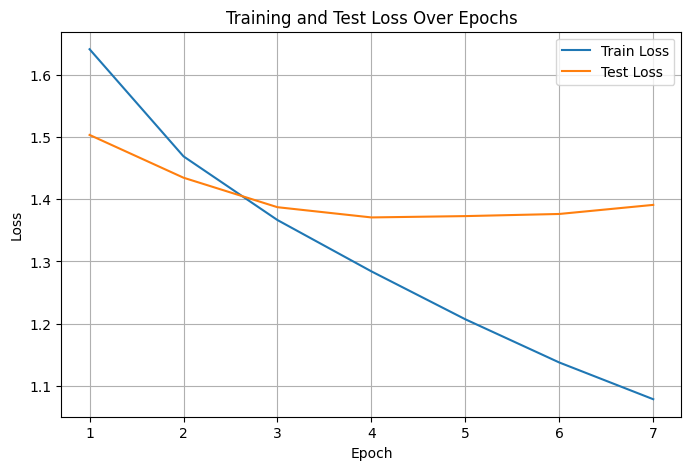

In [83]:
def plot_loss_curve(train_losses, test_losses, num_epochs):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
    plt.title('Training and Test Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_curve(train_losses, test_losses, 7)

### Evauate ResNet model

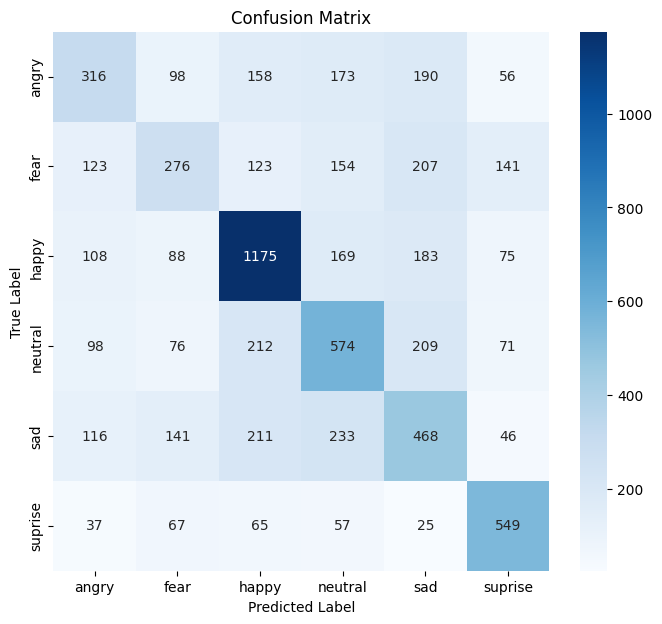

In [84]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_true, y_pred, CLASS_NAMES)

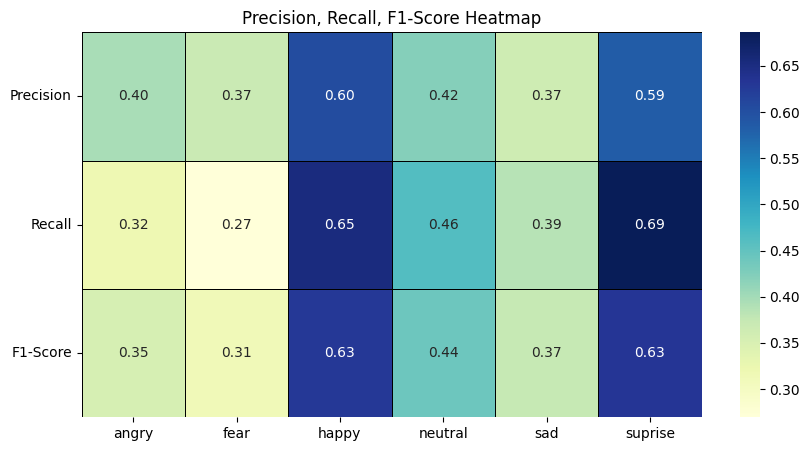

In [85]:
def plot_metrics_heatmap(y_true, y_pred, class_names):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Extract metrics (excluding accuracy and support)
    metrics_data = {
        name: [report[name]['precision'], report[name]['recall'], report[name]['f1-score']]
        for name in class_names
    }

    df_metrics = pd.DataFrame(metrics_data, index=['Precision', 'Recall', 'F1-Score'])

    plt.figure(figsize=(10, 5))
    sns.heatmap(df_metrics, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5, linecolor='black')
    plt.title('Precision, Recall, F1-Score Heatmap')
    plt.yticks(rotation=0)
    plt.show()

import pandas as pd
plot_metrics_heatmap(y_true, y_pred, CLASS_NAMES)

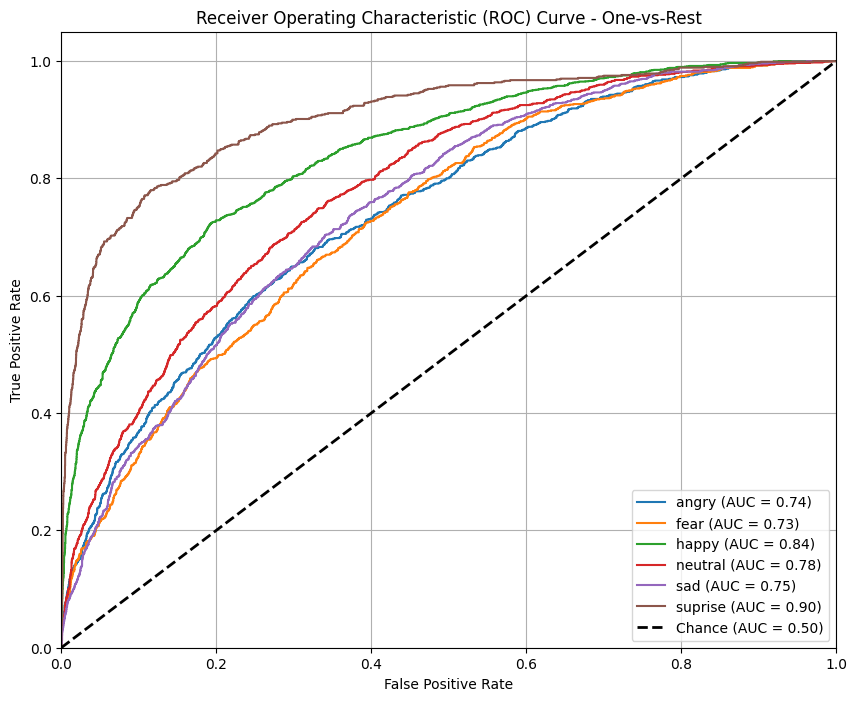

In [86]:
def plot_roc_curve(y_true, y_prob, class_names):
    # Binarize the labels for one-vs-rest ROC
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

    plt.figure(figsize=(10, 8))

    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(y_true, y_prob, CLASS_NAMES)

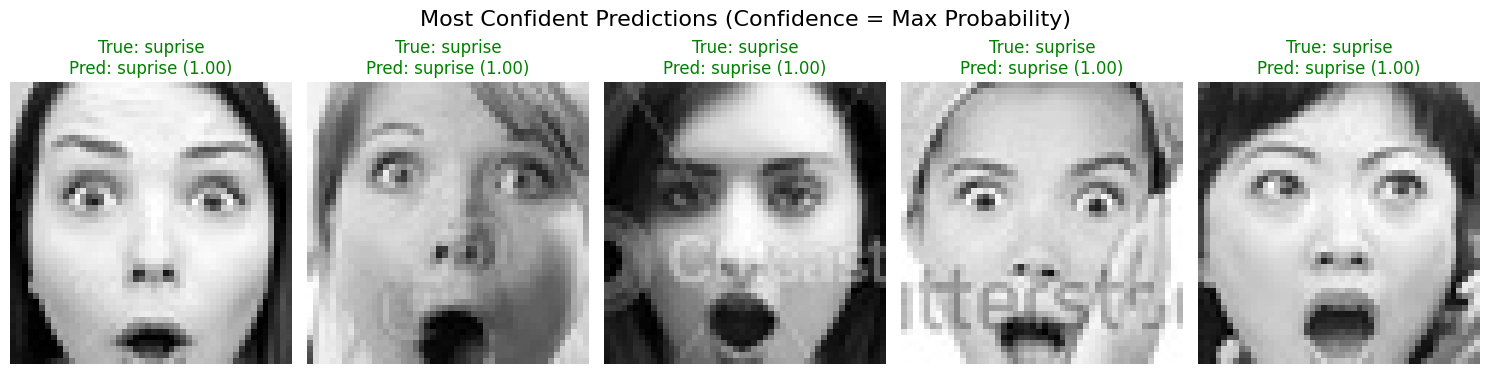

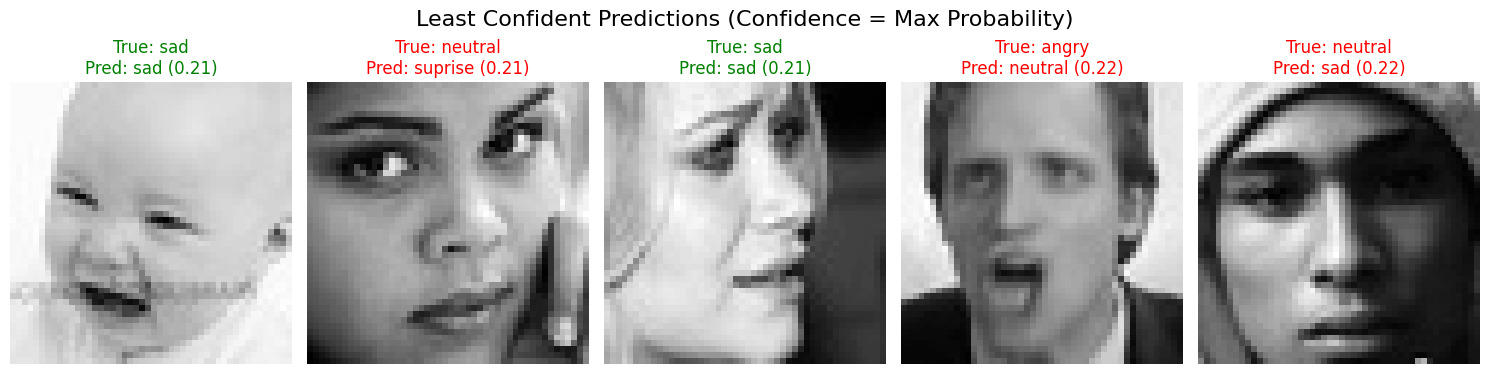

In [87]:
def plot_confident_images(X_images, y_true, y_prob, class_names, top_k=5, type='most'):
    # Get max probability for each sample and its predicted index
    max_probs = np.max(y_prob, axis=1)

    # Identify indices based on confidence
    if type == 'most':
        # Select the samples with the highest confidence
        confidence_indices = np.argsort(max_probs)[-top_k:]
        title_prefix = "Most Confident"
    else: # type == 'least'
        # Select the samples with the lowest confidence (most uncertain)
        confidence_indices = np.argsort(max_probs)[:top_k]
        title_prefix = "Least Confident"

    plt.figure(figsize=(15, 4))
    plt.suptitle(f"{title_prefix} Predictions (Confidence = Max Probability)", fontsize=16)

    for i, idx in enumerate(confidence_indices):
        plt.subplot(1, top_k, i + 1)

        # Reshape the image back to (48, 48) for display (since it's grayscale)
        # We need to reverse the normalization/3-channel step for display

        # IMPORTANT: Displaying the image correctly requires reversing the normalization
        # and selecting just one channel, but this is complicated.
        # For simplicity, we display the normalized image's first channel.
        # This will look strange but shows the input structure.

        img_display = X_images[idx][0] # Assuming channel 0 is representative

        true_class = class_names[y_true[idx]]
        pred_class = class_names[np.argmax(y_prob[idx])]
        confidence = max_probs[idx]

        plt.imshow(img_display, cmap='gray')
        plt.title(f"True: {true_class}\nPred: {pred_class} ({confidence:.2f})",
                  color='green' if true_class == pred_class else 'red')
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot the confident and uncertain images
plot_confident_images(X_test_images, y_true, y_prob, CLASS_NAMES, top_k=5, type='most')
plot_confident_images(X_test_images, y_true, y_prob, CLASS_NAMES, top_k=5, type='least')

In [88]:
def evaluate_accuracy(model, data_loader, device):
    """
    Calculate accuracy on a dataset

    Args:
        model: trained model
        data_loader: DataLoader for the dataset
        device: torch device (cuda/cpu)

    Returns:
        accuracy: percentage accuracy (0-100)
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Usage:
train_accuracy = evaluate_accuracy(trained_model, train_loader, device)
test_accuracy = evaluate_accuracy(trained_model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 67.35%
Test Accuracy: 47.51%
